# DonorsChoose

In [1]:
'''import os
os.environ["PATH"] += os.pathsep + "C:/Users/Raftaar Singh/Anaconda3/release/bin"'''

'import os\nos.environ["PATH"] += os.pathsep + "C:/Users/Raftaar Singh/Anaconda3/release/bin"'

In [ ]:
system("jupyter" "notebook" "list")

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [130]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [131]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [132]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [133]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.1 Sorted by time

In [134]:
#https://stats.stackexchange.com/questions/341312/train-test-split-with-time-and-person-indexed-data
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

##1.2 Adding resource data in dataframe

In [135]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [136]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [137]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36          Grades PreK-2   
1           UT 2016-04-27 00:31:25             Grades 3-5   

  project_subject_categories            project_subject_subcategories  \
0             Math & Science  Applied Sciences, Health & Life Science   
1              Special Needs                            Special Needs   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity  
0         4  
1         8

In [138]:
print(project_data["project_is_approved"].value_counts(normalize = True))

1    0.848583
0    0.151417
Name: project_is_approved, dtype: float64


Very high imbalance dataset so require to be balanced.

In [139]:
#project_data = project_data.sample(n=50000)
#project_data=project_data.tail(10000)
project_data.shape

(109248, 19)

In [140]:
project_data.shape

(109248, 19)

## project_grade_category cleaning

In [141]:
project_grade_category = []

for i in range(len(project_data)):
    a = project_data["project_grade_category"][i].replace(" ", "_")
    project_grade_category.append(a)

In [142]:
project_grade_category[0:5]

['Grades_PreK-2', 'Grades_3-5', 'Grades_PreK-2', 'Grades_PreK-2', 'Grades_3-5']

In [143]:
project_data.drop(['project_grade_category'], axis=1, inplace=True)
project_data["project_grade_category"] = project_grade_category

In [144]:
project_data["project_grade_category"].value_counts()

Grades_PreK-2    44225
Grades_3-5       37137
Grades_6-8       16923
Grades_9-12      10963
Name: project_grade_category, dtype: int64

## 1.3 preprocessing of `project_subject_categories`

In [145]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.4 preprocessing of `project_subject_subcategories`

In [146]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [147]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'project_grade_category', 'clean_categories',
       'clean_subcategories'],
      dtype='object')

## 1.3 Text preprocessing

In [148]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [149]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date  \
0           CA 2016-04-27 00:27:36   
1           UT 2016-04-27 00:31:25   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity project_grade_category clean_categories  \
0         4          Grades_PreK-2     Math_Science   
1         8             Grades_3-5     SpecialNeeds   

                  clean_subcategories  \
0  AppliedSciences Health_LifeScience   
1                        SpecialNeeds   

                                               essay  
0  I have been fortunate enough to use the Fairy ...  
1  Imagine being 8-9 years old. You're in your th...

In [150]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [151]:
'''# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)'''

'# printing some random reviews\nprint(project_data[\'essay\'].values[0])\nprint("="*50)\nprint(project_data[\'essay\'].values[150])\nprint("="*50)\nprint(project_data[\'essay\'].values[1000])\nprint("="*50)\nprint(project_data[\'essay\'].values[20000])\nprint("="*50)\nprint(project_data[\'essay\'].values[99999])\nprint("="*50)'

In [152]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [153]:
'''sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)'''

'sent = decontracted(project_data[\'essay\'].values[20000])\nprint(sent)\nprint("="*50)'

In [154]:
'''# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)'''

'# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/\nsent = sent.replace(\'\\r\', \' \')\nsent = sent.replace(\'\\"\', \' \')\nsent = sent.replace(\'\\n\', \' \')\nprint(sent)'

In [155]:
'''#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)'''

"#remove spacial character: https://stackoverflow.com/a/5843547/4084039\nsent = re.sub('[^A-Za-z0-9]+', ' ', sent)\nprint(sent)"

In [156]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

### 1.3.1Preprocess of Preprocessing of `essay`

In [157]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [02:34<00:00, 706.00it/s]


In [158]:
# after preprocesing
#preprocessed_essays[10:]

In [159]:
project_data['preprocessed_essays'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)

###<h2><font color='red'> 1.3.2Preprocessing of `project_title`</font></h2>

In [160]:
# similarly you can preprocess the titles also

In [161]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:05<00:00, 18525.60it/s]


In [162]:
# after preprocesing
#preprocessed_project_title[1000]

In [163]:
#https://stackoverflow.com/questions/26666919/add-column-in-dataframe-from-list/38490727
project_data['preprocessed_project_title'] = preprocessed_project_title
project_data.drop(['project_title'], axis=1, inplace=True)

In [164]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date  \
0           CA 2016-04-27 00:27:36   
1           UT 2016-04-27 00:31:25   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity project_grade_category clean_categories  \
0         4          Grades_PreK-2     Math_Science   
1         8             Grades_3-5     SpecialNeeds   

                  clean_subcategories  \
0  AppliedSciences Health_LifeScience   
1                        SpecialNeeds   

                                 preprocessed_essays  \
0  i fortunate enough use fairy tale stem kits cl...   
1  imagine 8 9 years old you third grade classroo...   

            preprocessed_project_title  
0  engineering steam primary classroom  
1                  sensory tools focus

In [165]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109248 entries, 0 to 109247
Data columns (total 20 columns):
Unnamed: 0                                      109248 non-null int64
id                                              109248 non-null object
teacher_id                                      109248 non-null object
teacher_prefix                                  109245 non-null object
school_state                                    109248 non-null object
Date                                            109248 non-null datetime64[ns]
project_essay_1                                 109248 non-null object
project_essay_2                                 109248 non-null object
project_essay_3                                 3758 non-null object
project_essay_4                                 3758 non-null object
project_resource_summary                        109248 non-null object
teacher_number_of_previously_posted_projects    109248 non-null int64
project_is_approved                

##total number of word in each title and essay,




In [166]:
#https://stackoverflow.com/questions/49984905/count-number-of-words-per-row
project_data['totalwords_title'] = project_data['preprocessed_project_title'].str.split().str.len()

project_data['totalwords_essay'] = project_data['preprocessed_essays'].str.split().str.len()
project_data['totalwords_essay']

0         175
1         179
2         116
3         127
4         114
5         159
6         173
7         280
8         198
9         170
10        163
11        250
12         97
13        150
14        240
15        200
16        164
17        260
18        208
19        154
20        125
21        183
22        160
23        151
24        173
25        127
26        230
27        172
28        158
29        187
         ... 
109218    104
109219    180
109220    153
109221    190
109222    212
109223    120
109224    162
109225    138
109226    203
109227    143
109228    141
109229    130
109230    155
109231    207
109232    149
109233    177
109234    184
109235    111
109236    133
109237    134
109238    138
109239    165
109240    178
109241    148
109242    151
109243    186
109244    115
109245    169
109246    124
109247    120
Name: totalwords_essay, Length: 109248, dtype: int64

No need of normilization or standarization in case of decision tree method

## Sentiment  feature of title and essay 

In [34]:
#!pip install vaderSentiment

In [35]:
'''#sentiment analysis of project_title
#_____________________________________________
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
#nltk.download('vader_lexicon')
catogories = list(project_data['preprocessed_project_title'].values)
sentiment_positive=[]
sentiment_negative=[]
sentiment_neutral=[]
sentiment_compound=[]
#cat_list = []
for i in catogories:
  sid = SentimentIntensityAnalyzer()
  sentiment_val=sid.polarity_scores(i)
  #cat_list.append(sentiment_val)
  sentiment_positive.append(sentiment_val['pos'])
  sentiment_negative.append(sentiment_val['neg'])
  sentiment_neutral.append(sentiment_val['neu'])
  sentiment_compound.append(sentiment_val['compound'])
    
#project_data['sentiment_pos_value'] = cat_list
project_data['sentiment_pos_title']=sentiment_positive
project_data['sentiment_neg_title']=sentiment_negative
project_data['sentiment_neu_title']=sentiment_neutral
project_data['sentiment_compound_title']=sentiment_compound'''

"#sentiment analysis of project_title\n#_____________________________________________\n#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f\n\nfrom nltk.sentiment.vader import SentimentIntensityAnalyzer\n\nimport nltk\n#nltk.download('vader_lexicon')\ncatogories = list(project_data['preprocessed_project_title'].values)\nsentiment_positive=[]\nsentiment_negative=[]\nsentiment_neutral=[]\nsentiment_compound=[]\n#cat_list = []\nfor i in catogories:\n  sid = SentimentIntensityAnalyzer()\n  sentiment_val=sid.polarity_scores(i)\n  #cat_list.append(sentiment_val)\n  sentiment_positive.append(sentiment_val['pos'])\n  sentiment_negative.append(sentiment_val['neg'])\n  sentiment_neutral.append(sentiment_val['neu'])\n  sentiment_compound.append(sentiment_val['compound'])\n    \n#project_data['sentiment_pos_value'] = cat_list\nproject_data['sentiment_pos_title']=sentiment_positive\nproject_data['sentiment_neg_title']=sentiment_negative

### Sentiment feature of title

In [36]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\IDM
[nltk_data]     LAB-09\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [37]:
#sentiment analysis of title
#_____________________________________________
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
#nltk.download('vader_lexicon')
catogories = list(project_data['preprocessed_project_title'].values)
sentiment_positive=[]
sentiment_negative=[]
sentiment_neutral=[]
sentiment_compound=[]
#cat_list = []
for i in catogories:
  sid = SentimentIntensityAnalyzer()
  sentiment_val=sid.polarity_scores(i)
  #cat_list.append(sentiment_val)
  sentiment_positive.append(sentiment_val['pos'])
  sentiment_negative.append(sentiment_val['neg'])
  sentiment_neutral.append(sentiment_val['neu'])
  sentiment_compound.append(sentiment_val['compound'])
    
#project_data['sentiment_pos_value'] = cat_list
project_data['sentiment_pos_title']=sentiment_positive
project_data['sentiment_neg_title']=sentiment_negative
project_data['sentiment_neu_title']=sentiment_neutral
project_data['sentiment_compound_title']=sentiment_compound

In [38]:
'''sentiment_pos_title=project_data['sentiment_pos_title'].values.reshape(-1,1)
sentiment_neg_title=project_data['sentiment_neg_title'].values.reshape(-1,1)
sentiment_neu_title=project_data['sentiment_neu_title'].values.reshape(-1,1)
sentiment_compound_title=project_data['sentiment_compound_title'].values.reshape(-1,1)
type(sentiment_pos_title)'''

"sentiment_pos_title=project_data['sentiment_pos_title'].values.reshape(-1,1)\nsentiment_neg_title=project_data['sentiment_neg_title'].values.reshape(-1,1)\nsentiment_neu_title=project_data['sentiment_neu_title'].values.reshape(-1,1)\nsentiment_compound_title=project_data['sentiment_compound_title'].values.reshape(-1,1)\ntype(sentiment_pos_title)"

### Sentiment feature of essay

In [38]:
#sentiment analysis of essay
#_____________________________________________
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
#nltk.download('vader_lexicon')
catogories = list(project_data['preprocessed_essays'].values)
sentiment_positive=[]
sentiment_negative=[]
sentiment_neutral=[]
sentiment_compound=[]
#cat_list = []
for i in catogories:
  sid = SentimentIntensityAnalyzer()
  sentiment_val=sid.polarity_scores(i)
  #cat_list.append(sentiment_val)
  sentiment_positive.append(sentiment_val['pos'])
  sentiment_negative.append(sentiment_val['neg'])
  sentiment_neutral.append(sentiment_val['neu'])
  sentiment_compound.append(sentiment_val['compound'])
    
#project_data['sentiment_pos_value'] = cat_list
project_data['sentiment_pos_essay']=sentiment_positive
project_data['sentiment_neg_essay']=sentiment_negative
project_data['sentiment_neu_essay']=sentiment_neutral
project_data['sentiment_compound_essay']=sentiment_compound

In [40]:
'''sentiment_pos_essay=project_data['sentiment_pos_essay'].values.reshape(-1,1)
sentiment_neg_essay=project_data['sentiment_neg_essay'].values.reshape(-1,1)
sentiment_neu_essay=project_data['sentiment_neu_essay'].values.reshape(-1,1)
sentiment_compound_essay=project_data['sentiment_compound_essay'].values.reshape(-1,1)
sentiment_pos_essay.shape'''

"sentiment_pos_essay=project_data['sentiment_pos_essay'].values.reshape(-1,1)\nsentiment_neg_essay=project_data['sentiment_neg_essay'].values.reshape(-1,1)\nsentiment_neu_essay=project_data['sentiment_neu_essay'].values.reshape(-1,1)\nsentiment_compound_essay=project_data['sentiment_compound_essay'].values.reshape(-1,1)\nsentiment_pos_essay.shape"

## spliting data into train test and cv(to avoid data leak, spliting done before probability base encoding of categorical variable)

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from collections import Counter
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [168]:
project_data1=project_data

In [169]:
#to check null column
#_____________________________________
print("is there any null value in teacher prefix dataset?", project_data['teacher_prefix'].isnull().any())
print("_"*50)
count_nan = len(project_data['teacher_prefix']) - project_data['teacher_prefix'].count()
print("number of row have null value", count_nan)

print("_"*50)

print("total number of row have null value", project_data['teacher_prefix'].isnull().sum())

is there any null value in teacher prefix dataset? True
__________________________________________________
number of row have null value 3
__________________________________________________
total number of row have null value 3


In [170]:
#https://stackoverflow.com/questions/54557423/series-object-has-no-attribute-values-counts
#https://stackoverflow.com/questions/26047209/what-is-the-difference-between-a-pandas-series-and-a-single-column-dataframe

y_project_data=project_data[project_data['teacher_prefix'].notnull()]
y_project_data.shape

(109245, 22)

In [171]:
y=y_project_data['project_is_approved']
y.shape

(109245,)

In [172]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split

#removing null row from teacher prefix column dataset
project_data = project_data[project_data['teacher_prefix'].notnull()]
project_data.shape

(109245, 22)

In [173]:
#https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/55608360

print("is there any null value in teacher prefix dataset?", project_data['teacher_prefix'].isnull().any())
print("_"*50)
count_nan = len(project_data['teacher_prefix']) - project_data['teacher_prefix'].count()
print("number of row have null value", count_nan)

print("_"*50)

print("total number of row have null value", project_data['teacher_prefix'].isnull().sum())

is there any null value in teacher prefix dataset? False
__________________________________________________
number of row have null value 0
__________________________________________________
total number of row have null value 0


**Observation**:  very few row have hull value of large dataset so better remove the null row

In [174]:
#series value count
project_data['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [175]:
'''#removing null row from teacher prefix column dataset
df_new['teacher_prefix'] = df_new['teacher_prefix'][df_new['teacher_prefix'].notnull()]'''

"#removing null row from teacher prefix column dataset\ndf_new['teacher_prefix'] = df_new['teacher_prefix'][df_new['teacher_prefix'].notnull()]"

In [176]:
'''#replace NAN to space https ://stackoverflow.com/questions/49259305/raise-valueerrornp-nan-is-an-invalid-document-expected-byte-or?rq=1
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna(' ')'''

"#replace NAN to space https ://stackoverflow.com/questions/49259305/raise-valueerrornp-nan-is-an-invalid-document-expected-byte-or?rq=1\nproject_data['teacher_prefix'] = project_data['teacher_prefix'].fillna(' ')"

In [177]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#split the data into train and test fo bag of words

x_train,x_test,y_train,y_test=model_selection.train_test_split(project_data,y,test_size=0.3,random_state=0)
#split train into cross val train and cross val test
#x_train,x_cv,y_train,y_cv=model_selection.train_test_split(x_t,y_t,test_size=0.3,random_state=0)

In [178]:
project_data.shape

(109245, 22)

In [179]:
x_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'project_grade_category', 'clean_categories',
       'clean_subcategories', 'preprocessed_essays',
       'preprocessed_project_title', 'totalwords_title', 'totalwords_essay'],
      dtype='object')

## encoding categorical features(probability ratio)

In [180]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'project_grade_category', 'clean_categories',
       'clean_subcategories', 'preprocessed_essays',
       'preprocessed_project_title', 'totalwords_title', 'totalwords_essay'],
      dtype='object')

In [181]:
x_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'project_grade_category', 'clean_categories',
       'clean_subcategories', 'preprocessed_essays',
       'preprocessed_project_title', 'totalwords_title', 'totalwords_essay'],
      dtype='object')

In [182]:
x_train_approved = x_train.loc[x_train['project_is_approved'] == 1]
x_train_reject = x_train.loc[x_train['project_is_approved'] == 0]

x_test_approved = x_test.loc[x_test['project_is_approved'] == 1]
x_test_reject = x_test.loc[x_test['project_is_approved'] == 0]

In [183]:
x_train_approved.drop(['project_is_approved'], axis=1, inplace=True)
x_train_reject.drop(['project_is_approved'], axis=1, inplace=True)
x_test_approved.drop(['project_is_approved'], axis=1, inplace=True)
x_test_reject.drop(['project_is_approved'], axis=1, inplace=True)
#X_cv.drop(['project_is_approved'], axis=1, inplace=True)





### clean category 

#### clean category x_train

In [184]:
#step1: Find counts of each
#__________________________________________
x_train_clean_category_approved = {}
x_train_clean_category_reject = {}
x_train_clean_category_total = {}

for a in x_train_approved['clean_categories'] :
    for b in a.split():
        if b not in x_train_clean_category_approved :
            x_train_clean_category_approved[b] = 1
        else :
            x_train_clean_category_approved[b] += 1
      

for a in x_train_reject['clean_categories'] :
    for b in a.split():
        if b not in x_train_clean_category_reject :
            x_train_clean_category_reject[b] = 1
        else :
            x_train_clean_category_reject[b] += 1

for a in x_train['clean_categories'] :
    for b in a.split():
        if b not in x_train_clean_category_total :
            x_train_clean_category_total[b] = 1
        else :
            x_train_clean_category_total[b] += 1            
            
            
print(x_train_clean_category_approved)
print(x_train_clean_category_reject)
print(x_train_clean_category_total)

{'AppliedLearning': 7030, 'Music_Arts': 6097, 'Literacy_Language': 31722, 'Math_Science': 24383, 'Warmth': 867, 'Care_Hunger': 867, 'SpecialNeeds': 8035, 'History_Civics': 3503, 'Health_Sports': 8436}
{'Math_Science': 4545, 'Literacy_Language': 4863, 'Health_Sports': 1557, 'SpecialNeeds': 1591, 'AppliedLearning': 1444, 'History_Civics': 579, 'Music_Arts': 1111, 'Warmth': 80, 'Care_Hunger': 80}
{'AppliedLearning': 8474, 'Music_Arts': 7208, 'Math_Science': 28928, 'Literacy_Language': 36585, 'Health_Sports': 9993, 'Warmth': 947, 'Care_Hunger': 947, 'SpecialNeeds': 9626, 'History_Civics': 4082}


In [185]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_train_approved_prob_clean_category = {}
x_train_reject_prob_clean_category = {}

for st in x_train_clean_category_total.keys():
  x_train_approved_prob_clean_category[st] = (x_train_clean_category_approved[st])/float(x_train_clean_category_total[st])
    

for stt in x_train_clean_category_total.keys():
  x_train_reject_prob_clean_category[stt] = (x_train_clean_category_reject[stt])/float(x_train_clean_category_total[stt])

In [186]:
#Step 3 : Apply probabilities to x_train_clean_category
#______________________________________________
x_train_reject_clean_category = []
x_train_approved_clean_category = []

for a in x_train["clean_categories"] :
    b = a.split()
    if len(b) == 1 :
        x_train_reject_clean_category.append(x_train_reject_prob_clean_category[a])
        x_train_approved_clean_category.append(x_train_approved_prob_clean_category[a])
    else :
        c = x_train_reject_prob_clean_category[b[0]]
        d = x_train_reject_prob_clean_category[b[1]]
        e = x_train_approved_prob_clean_category[b[0]]
        f = x_train_approved_prob_clean_category[b[1]]
        
        x_train_reject_clean_category.append(c*d)
        x_train_approved_clean_category.append(e*f)

In [187]:
x_train['x_train_reject_clean_category']=x_train_reject_clean_category
x_train['x_train_approved_clean_category']=x_train_approved_clean_category

In [188]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_reject_clean_category"].values.reshape(-1,1))
x_train_reject_clean_category_nor = normalizer.transform(x_train["x_train_reject_clean_category"].values.reshape(-1,1))

In [189]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_approved_clean_category"].values.reshape(-1,1))
x_train_approved_clean_category_nor = normalizer.transform(x_train["x_train_approved_clean_category"].values.reshape(-1,1))

#### clean category x_test

In [190]:
#step1: Find counts of each
#__________________________________________
x_test_clean_category_approved = {}
x_test_clean_category_reject = {}
x_test_clean_category_total = {}

for a in x_test_approved['clean_categories'] :
    for b in a.split():
        if b not in x_test_clean_category_approved :
            x_test_clean_category_approved[b] = 1
        else :
            x_test_clean_category_approved[b] += 1
      

for a in x_test_reject['clean_categories'] :
    for b in a.split():
        if b not in x_test_clean_category_reject :
            x_test_clean_category_reject[b] = 1
        else :
            x_test_clean_category_reject[b] += 1

for a in x_test['clean_categories'] :
    for b in a.split():
        if b not in x_test_clean_category_total :
            x_test_clean_category_total[b] = 1
        else :
            x_test_clean_category_total[b] += 1            
            
            
print(x_test_clean_category_approved)
print(x_test_clean_category_reject)
print(x_test_clean_category_total)

{'Literacy_Language': 13508, 'Math_Science': 10459, 'Music_Arts': 2577, 'Health_Sports': 3612, 'AppliedLearning': 3012, 'History_Civics': 1564, 'SpecialNeeds': 3355, 'Warmth': 407, 'Care_Hunger': 407}
{'AppliedLearning': 649, 'Math_Science': 2032, 'SpecialNeeds': 661, 'Health_Sports': 618, 'Literacy_Language': 2143, 'Music_Arts': 508, 'History_Civics': 268, 'Warmth': 34, 'Care_Hunger': 34}
{'Literacy_Language': 15651, 'Math_Science': 12491, 'Music_Arts': 3085, 'Health_Sports': 4230, 'AppliedLearning': 3661, 'SpecialNeeds': 4016, 'History_Civics': 1832, 'Warmth': 441, 'Care_Hunger': 441}


In [191]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_test_approved_prob_clean_category = {}
x_test_reject_prob_clean_category = {}

for st in x_test_clean_category_total.keys():
  x_test_approved_prob_clean_category[st] = (x_test_clean_category_approved[st])/float(x_test_clean_category_total[st])
    

for stt in x_test_clean_category_total.keys():
  x_test_reject_prob_clean_category[stt] = (x_test_clean_category_reject[stt])/float(x_test_clean_category_total[stt])

In [192]:
#Step 3 : Apply probabilities to x_test_clean_category
#______________________________________________
x_test_reject_clean_category = []
x_test_approved_clean_category = []

for a in x_test["clean_categories"] :
    b = a.split()
    if len(b) == 1 :
        x_test_reject_clean_category.append(x_test_reject_prob_clean_category[a])
        x_test_approved_clean_category.append(x_test_approved_prob_clean_category[a])
    else :
        c = x_test_reject_prob_clean_category[b[0]]
        d = x_test_reject_prob_clean_category[b[1]]
        e = x_test_approved_prob_clean_category[b[0]]
        f = x_test_approved_prob_clean_category[b[1]]
        
        x_test_reject_clean_category.append(c*d)
        x_test_approved_clean_category.append(e*f)

In [193]:
x_test['x_test_reject_clean_category']=x_test_reject_clean_category
x_test['x_test_approved_clean_category']=x_test_approved_clean_category

In [194]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_reject_clean_category"].values.reshape(-1,1))
x_test_reject_clean_category_nor = normalizer.transform(x_test["x_test_reject_clean_category"].values.reshape(-1,1))

In [195]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_approved_clean_category"].values.reshape(-1,1))
x_test_approved_clean_category_nor = normalizer.transform(x_test["x_test_approved_clean_category"].values.reshape(-1,1))

### clean_subcategories

#### clean subcategory x_train

In [196]:
#step1: Find counts of each
#__________________________________________
x_train_clean_subcategory_approved = {}
x_train_clean_subcategory_reject = {}
x_train_clean_subcategory_total = {}

for a in x_train_approved['clean_subcategories'] :
    for b in a.split():
        if b not in x_train_clean_subcategory_approved :
            x_train_clean_subcategory_approved[b] = 1
        else :
            x_train_clean_subcategory_approved[b] += 1
      

for a in x_train_reject['clean_subcategories'] :
    for b in a.split():
        if b not in x_train_clean_subcategory_reject :
            x_train_clean_subcategory_reject[b] = 1
        else :
            x_train_clean_subcategory_reject[b] += 1

for a in x_train['clean_subcategories'] :
    for b in a.split():
        if b not in x_train_clean_subcategory_total :
            x_train_clean_subcategory_total[b] = 1
        else :
            x_train_clean_subcategory_total[b] += 1            
            
            
print(x_train_clean_subcategory_approved)
print(x_train_clean_subcategory_reject)
print(x_train_clean_subcategory_total)

{'EarlyDevelopment': 2459, 'PerformingArts': 1211, 'VisualArts': 3610, 'Literature_Writing': 13322, 'Mathematics': 16617, 'College_CareerPrep': 1487, 'Warmth': 867, 'Care_Hunger': 867, 'SpecialNeeds': 8035, 'AppliedSciences': 6312, 'Other': 1368, 'History_Geography': 1873, 'Literacy': 20647, 'ESL': 2644, 'CommunityService': 236, 'EnvironmentalScience': 3191, 'TeamSports': 1190, 'CharacterEducation': 1169, 'Health_Wellness': 6179, 'Gym_Fitness': 2677, 'Health_LifeScience': 2447, 'ForeignLanguages': 502, 'Civics_Government': 450, 'Extracurricular': 456, 'ParentInvolvement': 443, 'Music': 1949, 'SocialSciences': 1165, 'NutritionEducation': 760, 'FinancialLiteracy': 349, 'Economics': 153}
{'AppliedSciences': 1308, 'Literacy': 3012, 'Health_Wellness': 1000, 'Mathematics': 2936, 'Literature_Writing': 2166, 'SpecialNeeds': 1591, 'NutritionEducation': 186, 'Other': 285, 'EarlyDevelopment': 516, 'Health_LifeScience': 512, 'TeamSports': 332, 'FinancialLiteracy': 61, 'ForeignLanguages': 117, 'Gym

In [197]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_train_approved_prob_clean_subcategory = {}
x_train_reject_prob_clean_subcategory = {}

for st in x_train_clean_subcategory_total.keys():
  x_train_approved_prob_clean_subcategory[st] = (x_train_clean_subcategory_approved[st])/float(x_train_clean_subcategory_total[st])
    

for stt in x_train_clean_subcategory_total.keys():
  x_train_reject_prob_clean_subcategory[stt] = (x_train_clean_subcategory_reject[stt])/float(x_train_clean_subcategory_total[stt])

In [198]:
#Step 3 : Apply probabilities to x_train_clean_subcategory
#______________________________________________
x_train_reject_clean_subcategory = []
x_train_approved_clean_subcategory = []

for a in x_train["clean_subcategories"] :
    b = a.split()
    if len(b) == 1 :
        x_train_reject_clean_subcategory.append(x_train_reject_prob_clean_subcategory[a])
        x_train_approved_clean_subcategory.append(x_train_approved_prob_clean_subcategory[a])
    else :
        c = x_train_reject_prob_clean_subcategory[b[0]]
        d = x_train_reject_prob_clean_subcategory[b[1]]
        e = x_train_approved_prob_clean_subcategory[b[0]]
        f = x_train_approved_prob_clean_subcategory[b[1]]
        
        x_train_reject_clean_subcategory.append(c*d)
        x_train_approved_clean_subcategory.append(e*f)

In [199]:
x_train['x_train_reject_clean_subcategory']=x_train_reject_clean_subcategory
x_train['x_train_approved_clean_subcategory']=x_train_approved_clean_subcategory

In [200]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_reject_clean_subcategory"].values.reshape(-1,1))
x_train_reject_clean_subcategory_nor = normalizer.transform(x_train["x_train_reject_clean_subcategory"].values.reshape(-1,1))

In [201]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_approved_clean_subcategory"].values.reshape(-1,1))
x_train_approved_clean_subcategory_nor = normalizer.transform(x_train["x_train_approved_clean_subcategory"].values.reshape(-1,1))

#### clean subsubcategory x_test

In [202]:
#step1: Find counts of each
#__________________________________________
x_test_clean_subcategory_approved = {}
x_test_clean_subcategory_reject = {}
x_test_clean_subcategory_total = {}

for a in x_test_approved['clean_subcategories'] :
    for b in a.split():
        if b not in x_test_clean_subcategory_approved :
            x_test_clean_subcategory_approved[b] = 1
        else :
            x_test_clean_subcategory_approved[b] += 1
      

for a in x_test_reject['clean_subcategories'] :
    for b in a.split():
        if b not in x_test_clean_subcategory_reject :
            x_test_clean_subcategory_reject[b] = 1
        else :
            x_test_clean_subcategory_reject[b] += 1

for a in x_test['clean_subcategories'] :
    for b in a.split():
        if b not in x_test_clean_subcategory_total :
            x_test_clean_subcategory_total[b] = 1
        else :
            x_test_clean_subcategory_total[b] += 1            
            
            
print(x_test_clean_subcategory_approved)
print(x_test_clean_subcategory_reject)
print(x_test_clean_subcategory_total)

{'ForeignLanguages': 218, 'Mathematics': 7160, 'Music': 824, 'Gym_Fitness': 1133, 'Health_Wellness': 2650, 'AppliedSciences': 2635, 'Literature_Writing': 5723, 'Literacy': 8774, 'College_CareerPrep': 660, 'History_Geography': 843, 'VisualArts': 1547, 'CharacterEducation': 496, 'SpecialNeeds': 3355, 'SocialSciences': 492, 'Extracurricular': 217, 'ESL': 1077, 'Warmth': 407, 'Care_Hunger': 407, 'CommunityService': 107, 'Health_LifeScience': 1054, 'EnvironmentalScience': 1399, 'Civics_Government': 241, 'TeamSports': 545, 'Other': 591, 'NutritionEducation': 341, 'ParentInvolvement': 137, 'EarlyDevelopment': 1053, 'Economics': 73, 'PerformingArts': 481, 'FinancialLiteracy': 131}
{'EarlyDevelopment': 226, 'Mathematics': 1359, 'SpecialNeeds': 661, 'Health_Wellness': 405, 'Literacy': 1266, 'Health_LifeScience': 222, 'NutritionEducation': 68, 'VisualArts': 361, 'History_Geography': 129, 'AppliedSciences': 561, 'EnvironmentalScience': 297, 'Literature_Writing': 966, 'College_CareerPrep': 118, 'Pe

In [203]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_test_approved_prob_clean_subcategory = {}
x_test_reject_prob_clean_subcategory = {}

for st in x_test_clean_subcategory_total.keys():
  x_test_approved_prob_clean_subcategory[st] = (x_test_clean_subcategory_approved[st])/float(x_test_clean_subcategory_total[st])
    

for stt in x_test_clean_subcategory_total.keys():
  x_test_reject_prob_clean_subcategory[stt] = (x_test_clean_subcategory_reject[stt])/float(x_test_clean_subcategory_total[stt])

In [204]:
#Step 3 : Apply probabilities to x_test_clean_subcategory
#______________________________________________
x_test_reject_clean_subcategory = []
x_test_approved_clean_subcategory = []

for a in x_test["clean_subcategories"] :
    b = a.split()
    if len(b) == 1 :
        x_test_reject_clean_subcategory.append(x_test_reject_prob_clean_subcategory[a])
        x_test_approved_clean_subcategory.append(x_test_approved_prob_clean_subcategory[a])
    else :
        c = x_test_reject_prob_clean_subcategory[b[0]]
        d = x_test_reject_prob_clean_subcategory[b[1]]
        e = x_test_approved_prob_clean_subcategory[b[0]]
        f = x_test_approved_prob_clean_subcategory[b[1]]
        
        x_test_reject_clean_subcategory.append(c*d)
        x_test_approved_clean_subcategory.append(e*f)

In [205]:
x_test['x_test_reject_clean_subcategory']=x_test_reject_clean_subcategory
x_test['x_test_approved_clean_subcategory']=x_test_approved_clean_subcategory

In [206]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_reject_clean_subcategory"].values.reshape(-1,1))
x_test_reject_clean_subcategory_nor = normalizer.transform(x_test["x_test_reject_clean_subcategory"].values.reshape(-1,1))

In [207]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_approved_clean_subcategory"].values.reshape(-1,1))
x_test_approved_clean_subcategory_nor = normalizer.transform(x_test["x_test_approved_clean_subcategory"].values.reshape(-1,1))

### Project Grade Category 

#### Project Grade Category x_train

In [208]:
#step1: Find counts of each
#__________________________________________
x_train_grade_approved = {}
x_train_grade_reject = {}
x_train_grade_total = {}

for a in x_train_approved['project_grade_category'] :
    for b in a.split():
        if b not in x_train_grade_approved :
            x_train_grade_approved[b] = 1
        else :
            x_train_grade_approved[b] += 1
      

for a in x_train_reject['project_grade_category'] :
    for b in a.split():
        if b not in x_train_grade_reject :
            x_train_grade_reject[b] = 1
        else :
            x_train_grade_reject[b] += 1

for a in x_train['project_grade_category'] :
    for b in a.split():
        if b not in x_train_grade_total :
            x_train_grade_total[b] = 1
        else :
            x_train_grade_total[b] += 1            
            
            
print(x_train_grade_approved)
print(x_train_grade_reject)
print(x_train_grade_total)

{'Grades_PreK-2': 26316, 'Grades_9-12': 6407, 'Grades_3-5': 22193, 'Grades_6-8': 10010}
{'Grades_PreK-2': 4692, 'Grades_3-5': 3712, 'Grades_6-8': 1868, 'Grades_9-12': 1273}
{'Grades_PreK-2': 31008, 'Grades_9-12': 7680, 'Grades_3-5': 25905, 'Grades_6-8': 11878}


In [209]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_train_approved_prob_grade = {}
x_train_reject_prob_grade = {}

for st in x_train_grade_total.keys():
  x_train_approved_prob_grade[st] = (x_train_grade_approved[st])/float(x_train_grade_total[st])
    

for stt in x_train_grade_total.keys():
  x_train_reject_prob_grade[stt] = (x_train_grade_reject[stt])/float(x_train_grade_total[stt])

In [210]:
#Step 3 : Apply probabilities to clean_category
#______________________________________________
x_train_reject_grade = []
x_train_approved_grade = []

for a in x_train["project_grade_category"] :
    b = a.split()
    if len(b) == 1 :
        x_train_reject_grade.append(x_train_reject_prob_grade[a])
        x_train_approved_grade.append(x_train_approved_prob_grade[a])
    else :
        c = x_train_reject_prob_grade[b[0]]
        d = x_train_reject_prob_grade[b[1]]
        e = x_train_approved_prob_grade[b[0]]
        f = x_train_approved_prob_grade[b[1]]
        
        x_train_reject_grade.append(c*d)
        x_train_approved_grade.append(e*f)

In [211]:
x_train['x_train_reject_grade']=x_train_reject_grade
x_train['x_train_approved_grade']=x_train_approved_grade

In [212]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_reject_grade"].values.reshape(-1,1))
x_train_reject_grade_nor = normalizer.transform(x_train["x_train_reject_grade"].values.reshape(-1,1))

In [213]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_approved_grade"].values.reshape(-1,1))
x_train_approved_grade_nor = normalizer.transform(x_train["x_train_approved_grade"].values.reshape(-1,1))

#### Project Grade Category x_test

In [214]:
#step1: Find counts of each
#__________________________________________
x_test_grade_approved = {}
x_test_grade_reject = {}
x_test_grade_total = {}

for a in x_test_approved['project_grade_category'] :
    for b in a.split():
        if b not in x_test_grade_approved :
            x_test_grade_approved[b] = 1
        else :
            x_test_grade_approved[b] += 1
      

for a in x_test_reject['project_grade_category'] :
    for b in a.split():
        if b not in x_test_grade_reject :
            x_test_grade_reject[b] = 1
        else :
            x_test_grade_reject[b] += 1

for a in x_test['project_grade_category'] :
    for b in a.split():
        if b not in x_test_grade_total :
            x_test_grade_total[b] = 1
        else :
            x_test_grade_total[b] += 1            
            
            
print(x_test_grade_approved)
print(x_test_grade_reject)
print(x_test_grade_total)

{'Grades_9-12': 2775, 'Grades_PreK-2': 11220, 'Grades_6-8': 4248, 'Grades_3-5': 9534}
{'Grades_PreK-2': 1997, 'Grades_6-8': 797, 'Grades_9-12': 507, 'Grades_3-5': 1696}
{'Grades_9-12': 3282, 'Grades_PreK-2': 13217, 'Grades_6-8': 5045, 'Grades_3-5': 11230}


In [215]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_test_approved_prob_grade = {}
x_test_reject_prob_grade = {}

for st in x_test_grade_total.keys():
  x_test_approved_prob_grade[st] = (x_test_grade_approved[st])/float(x_test_grade_total[st])
    

for stt in x_test_grade_total.keys():
  x_test_reject_prob_grade[stt] = (x_test_grade_reject[stt])/float(x_test_grade_total[stt])

In [216]:
#Step 3 : Apply probabilities to clean_category
#______________________________________________
x_test_reject_grade = []
x_test_approved_grade = []

for a in x_test["project_grade_category"] :
    b = a.split()
    if len(b) == 1 :
        x_test_reject_grade.append(x_test_reject_prob_grade[a])
        x_test_approved_grade.append(x_test_approved_prob_grade[a])
    else :
        c = x_test_reject_prob_grade[b[0]]
        d = x_test_reject_prob_grade[b[1]]
        e = x_test_approved_prob_grade[b[0]]
        f = x_test_approved_prob_grade[b[1]]
        
        x_test_reject_grade.append(c*d)
        x_test_approved_grade.append(e*f)

In [217]:
x_test['x_test_reject_grade']=x_test_reject_grade
x_test['x_test_approved_grade']=x_test_approved_grade

In [218]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_reject_grade"].values.reshape(-1,1))
x_test_reject_grade_nor = normalizer.transform(x_test["x_test_reject_grade"].values.reshape(-1,1))

In [219]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_approved_grade"].values.reshape(-1,1))
x_test_approved_grade_nor = normalizer.transform(x_test["x_test_approved_grade"].values.reshape(-1,1))

### Teacher Prefix

#### Teacher Prefix train

In [220]:
count_nan = len(project_data['teacher_prefix']) - project_data['teacher_prefix'].count()
count_nan

0

In [221]:
project_data['teacher_prefix'].isnull().any()

False

In [222]:
project_data['teacher_prefix'].isnull().sum()

0

In [223]:
project_data['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [224]:
#step1: Find counts of each
#__________________________________________
x_train_teacher_prefix_approved = {}
x_train_teacher_prefix_reject = {}
x_train_teacher_prefix_total = {}

for a in x_train_approved['teacher_prefix'] :
    for b in a.split():
        if b not in x_train_teacher_prefix_approved :
            x_train_teacher_prefix_approved[b] = 1
        else :
            x_train_teacher_prefix_approved[b] += 1
      

for a in x_train_reject['teacher_prefix'] :
    for b in a.split():
        if b not in x_train_teacher_prefix_reject :
            x_train_teacher_prefix_reject[b] = 1
        else :
            x_train_teacher_prefix_reject[b] += 1

for a in x_train['teacher_prefix'] :
    for b in a.split():
        if b not in x_train_teacher_prefix_total :
            x_train_teacher_prefix_total[b] = 1
        else :
            x_train_teacher_prefix_total[b] += 1            
            
            
print(x_train_teacher_prefix_approved)
print(x_train_teacher_prefix_reject)
print(x_train_teacher_prefix_total)

{'Mrs.': 34306, 'Ms.': 22995, 'Mr.': 6295, 'Teacher': 1324, 'Dr.': 6}
{'Ms.': 4266, 'Mrs.': 5733, 'Teacher': 338, 'Mr.': 1205, 'Dr.': 3}
{'Mrs.': 40039, 'Ms.': 27261, 'Mr.': 7500, 'Teacher': 1662, 'Dr.': 9}


In [227]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_train_approved_prob_teacher_prefix = {}
x_train_reject_prob_teacher_prefix = {}

for st in x_train_teacher_prefix_total.keys():
  x_train_approved_prob_teacher_prefix[st] = (x_train_teacher_prefix_approved[st])/float(x_train_teacher_prefix_total[st])
    

for stt in x_train_teacher_prefix_total.keys():
  x_train_reject_prob_teacher_prefix[stt] = (x_train_teacher_prefix_reject[stt])/float(x_train_teacher_prefix_total[stt])

In [228]:
#Step 3 : Apply probabilities to 
x_train_reject_teacher_prefix = []
x_train_approved_teacher_prefix = []

for a in x_train["teacher_prefix"] :
    b = a.split()
    if len(b) == 1 :
        x_train_reject_teacher_prefix.append(x_train_reject_prob_teacher_prefix[a])
        x_train_approved_teacher_prefix.append(x_train_approved_prob_teacher_prefix[a])
    else :
        c = x_train_reject_prob_teacher_prefix[b[0]]
        d = x_train_reject_prob_teacher_prefix[b[1]]
        e = x_train_approved_prob_teacher_prefix[b[0]]
        f = x_train_approved_prob_teacher_prefix[b[1]]
        
        x_train_reject_teacher_prefix.append(c*d)
        x_train_approved_teacher_prefix.append(e*f)

In [229]:
x_train['x_train_reject_teacher_prefix']=x_train_reject_teacher_prefix
x_train['x_train_approved_teacher_prefix']=x_train_approved_teacher_prefix

In [230]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_reject_teacher_prefix"].values.reshape(-1,1))
x_train_reject_teacher_prefix_nor = normalizer.transform(x_train["x_train_reject_teacher_prefix"].values.reshape(-1,1))

In [231]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_approved_teacher_prefix"].values.reshape(-1,1))
x_train_approved_teacher_prefix_nor = normalizer.transform(x_train["x_train_approved_teacher_prefix"].values.reshape(-1,1))

#### Teacher Prefix test

In [232]:
#step1: Find counts of each
#__________________________________________
x_test_teacher_prefix_approved = {}
x_test_teacher_prefix_reject = {}
x_test_teacher_prefix_total = {}

for a in x_test_approved['teacher_prefix'] :
    for b in a.split():
        if b not in x_test_teacher_prefix_approved :
            x_test_teacher_prefix_approved[b] = 1
        else :
            x_test_teacher_prefix_approved[b] += 1
      

for a in x_test_reject['teacher_prefix'] :
    for b in a.split():
        if b not in x_test_teacher_prefix_reject :
            x_test_teacher_prefix_reject[b] = 1
        else :
            x_test_teacher_prefix_reject[b] += 1

for a in x_test['teacher_prefix'] :
    for b in a.split():
        if b not in x_test_teacher_prefix_total :
            x_test_teacher_prefix_total[b] = 1
        else :
            x_test_teacher_prefix_total[b] += 1            
            
            
print(x_test_teacher_prefix_approved)
print(x_test_teacher_prefix_reject)
print(x_test_teacher_prefix_total)

{'Mrs.': 14691, 'Ms.': 9865, 'Mr.': 2665, 'Teacher': 553, 'Dr.': 3}
{'Mrs.': 2539, 'Ms.': 1829, 'Mr.': 483, 'Teacher': 145, 'Dr.': 1}
{'Mrs.': 17230, 'Ms.': 11694, 'Mr.': 3148, 'Teacher': 698, 'Dr.': 4}


In [233]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_test_approved_prob_teacher_prefix = {}
x_test_reject_prob_teacher_prefix = {}

for st in x_test_teacher_prefix_total.keys():
  x_test_approved_prob_teacher_prefix[st] = (x_test_teacher_prefix_approved[st])/float(x_test_teacher_prefix_total[st])
    

for stt in x_test_teacher_prefix_total.keys():
  x_test_reject_prob_teacher_prefix[stt] = (x_test_teacher_prefix_reject[stt])/float(x_test_teacher_prefix_total[stt])

In [234]:
#Step 3 : Apply probabilities to clean_category
#______________________________________________
x_test_reject_teacher_prefix = []
x_test_approved_teacher_prefix = []

for a in x_test["teacher_prefix"] :
    b = a.split()
    if len(b) == 1 :
        x_test_reject_teacher_prefix.append(x_test_reject_prob_teacher_prefix[a])
        x_test_approved_teacher_prefix.append(x_test_approved_prob_teacher_prefix[a])
    else :
        c = x_test_reject_prob_teacher_prefix[b[0]]
        d = x_test_reject_prob_teacher_prefix[b[1]]
        e = x_test_approved_prob_teacher_prefix[b[0]]
        f = x_test_approved_prob_teacher_prefix[b[1]]
        
        x_test_reject_teacher_prefix.append(c*d)
        x_test_approved_teacher_prefix.append(e*f)

In [235]:
x_test['x_test_reject_teacher_prefix']=x_test_reject_teacher_prefix
x_test['x_test_approved_teacher_prefix']=x_test_approved_teacher_prefix

In [236]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_reject_teacher_prefix"].values.reshape(-1,1))
x_test_reject_teacher_prefix_nor = normalizer.transform(x_test["x_test_reject_teacher_prefix"].values.reshape(-1,1))

In [237]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_approved_teacher_prefix"].values.reshape(-1,1))
x_test_approved_teacher_prefix_nor = normalizer.transform(x_test["x_test_approved_teacher_prefix"].values.reshape(-1,1))

### School State

#### School State train

In [238]:
#step1: Find counts of each
#__________________________________________
x_train_school_state_approved = {}
x_train_school_state_reject = {}
x_train_school_state_total = {}

for a in x_train_approved['school_state'] :
    for b in a.split():
        if b not in x_train_school_state_approved :
            x_train_school_state_approved[b] = 1
        else :
            x_train_school_state_approved[b] += 1
      

for a in x_train_reject['school_state'] :
    for b in a.split():
        if b not in x_train_school_state_reject :
            x_train_school_state_reject[b] = 1
        else :
            x_train_school_state_reject[b] += 1

for a in x_train['school_state'] :
    for b in a.split():
        if b not in x_train_school_state_total :
            x_train_school_state_total[b] = 1
        else :
            x_train_school_state_total[b] += 1            
            
            
print(x_train_school_state_approved)
print(x_train_school_state_reject)
print(x_train_school_state_total)

{'AK': 203, 'LA': 1370, 'OH': 1493, 'NY': 4419, 'CA': 9219, 'NC': 3053, 'GA': 2344, 'MO': 1532, 'OK': 1327, 'WA': 1426, 'VA': 1247, 'NH': 217, 'MI': 1877, 'FL': 3603, 'IL': 2626, 'UT': 992, 'IN': 1564, 'MA': 1439, 'PA': 1880, 'TX': 4184, 'SD': 175, 'MN': 766, 'TN': 1015, 'AZ': 1282, 'KS': 386, 'NJ': 1338, 'SC': 2334, 'KY': 799, 'CO': 652, 'MD': 867, 'OR': 741, 'WI': 1047, 'MS': 798, 'NV': 787, 'IA': 381, 'WV': 320, 'HI': 314, 'CT': 1031, 'DC': 286, 'AL': 1035, 'WY': 63, 'ME': 311, 'AR': 622, 'ND': 98, 'NM': 313, 'DE': 202, 'VT': 39, 'NE': 188, 'MT': 138, 'ID': 394, 'RI': 189}
{'NY': 741, 'CA': 1556, 'FL': 747, 'AL': 182, 'CT': 150, 'WI': 196, 'MI': 318, 'TX': 978, 'RI': 32, 'MA': 227, 'IL': 469, 'NC': 532, 'IN': 295, 'UT': 203, 'MO': 253, 'NJ': 242, 'OK': 267, 'SC': 362, 'VA': 212, 'AZ': 232, 'OH': 208, 'CO': 123, 'HI': 50, 'PA': 310, 'WA': 191, 'GA': 442, 'MD': 173, 'TN': 171, 'AR': 119, 'ME': 56, 'LA': 280, 'OR': 131, 'MN': 122, 'WV': 46, 'KY': 123, 'MT': 33, 'MS': 134, 'AK': 36, 'NE

In [239]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_train_approved_prob_school_state = {}
x_train_reject_prob_school_state = {}

for st in x_train_school_state_total.keys():
  x_train_approved_prob_school_state[st] = (x_train_school_state_approved[st])/float(x_train_school_state_total[st])
    

for stt in x_train_school_state_total.keys():
  x_train_reject_prob_school_state[stt] = (x_train_school_state_reject[stt])/float(x_train_school_state_total[stt])

In [240]:
#Step 3 : Apply probabilities to clean_category
#______________________________________________
x_train_reject_school_state = []
x_train_approved_school_state = []

for a in x_train["school_state"] :
    b = a.split()
    if len(b) == 1 :
        x_train_reject_school_state.append(x_train_reject_prob_school_state[a])
        x_train_approved_school_state.append(x_train_approved_prob_school_state[a])
    else :
        c = x_train_reject_prob_school_state[b[0]]
        d = x_train_reject_prob_school_state[b[1]]
        e = x_train_approved_prob_school_state[b[0]]
        f = x_train_approved_prob_school_state[b[1]]
        
        x_train_reject_school_state.append(c*d)
        x_train_approved_school_state.append(e*f)

In [241]:
x_train['x_train_reject_school_state']=x_train_reject_school_state
x_train['x_train_approved_school_state']=x_train_approved_school_state

In [242]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_reject_school_state"].values.reshape(-1,1))
x_train_reject_school_state_nor = normalizer.transform(x_train["x_train_reject_school_state"].values.reshape(-1,1))

In [243]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_train["x_train_approved_school_state"].values.reshape(-1,1))
x_train_approved_school_state_nor = normalizer.transform(x_train["x_train_approved_school_state"].values.reshape(-1,1))



#### School State test

In [244]:
#step1: Find counts of each
#__________________________________________
x_test_school_state_approved = {}
x_test_school_state_reject = {}
x_test_school_state_total = {}

for a in x_test_approved['school_state'] :
    for b in a.split():
        if b not in x_test_school_state_approved :
            x_test_school_state_approved[b] = 1
        else :
            x_test_school_state_approved[b] += 1
      

for a in x_test_reject['school_state'] :
    for b in a.split():
        if b not in x_test_school_state_reject :
            x_test_school_state_reject[b] = 1
        else :
            x_test_school_state_reject[b] += 1

for a in x_test['school_state'] :
    for b in a.split():
        if b not in x_test_school_state_total :
            x_test_school_state_total[b] = 1
        else :
            x_test_school_state_total[b] += 1            
            
            
print(x_test_school_state_approved)
print(x_test_school_state_reject)
print(x_test_school_state_total)

{'TX': 1830, 'OK': 573, 'CA': 3985, 'MD': 403, 'MO': 670, 'AZ': 518, 'OR': 315, 'VA': 492, 'DE': 106, 'NC': 1300, 'NV': 380, 'MI': 795, 'NY': 1872, 'CO': 283, 'NJ': 550, 'PA': 777, 'AL': 471, 'LA': 620, 'FL': 1541, 'AR': 250, 'WI': 498, 'IN': 650, 'WA': 619, 'MN': 270, 'MA': 616, 'ID': 185, 'CT': 414, 'NM': 166, 'SC': 1050, 'OH': 666, 'GA': 985, 'VT': 25, 'WV': 110, 'NE': 72, 'UT': 456, 'IL': 1084, 'IA': 187, 'SD': 77, 'TN': 420, 'NH': 87, 'HI': 120, 'DC': 128, 'KY': 327, 'ME': 117, 'KS': 146, 'AK': 87, 'RI': 54, 'MS': 320, 'MT': 62, 'ND': 29, 'WY': 19}
{'GA': 192, 'CA': 627, 'MA': 107, 'DC': 37, 'TX': 404, 'IA': 35, 'DE': 19, 'PA': 141, 'UT': 80, 'MO': 121, 'SC': 189, 'OK': 109, 'NC': 206, 'TN': 82, 'AL': 74, 'FL': 294, 'OH': 100, 'CT': 68, 'NV': 64, 'IN': 111, 'AK': 19, 'NY': 286, 'VA': 94, 'ID': 34, 'AZ': 115, 'LA': 124, 'WA': 98, 'OR': 55, 'MD': 71, 'CO': 53, 'IL': 171, 'WI': 86, 'MN': 50, 'VT': 4, 'MI': 171, 'AR': 58, 'HI': 23, 'ME': 21, 'KS': 37, 'NJ': 107, 'NM': 22, 'MS': 71, 'N

In [245]:
#step2: Find Probabilities with respect to classes
#___________________________________________________

x_test_approved_prob_school_state = {}
x_test_reject_prob_school_state = {}

for st in x_test_school_state_total.keys():
  x_test_approved_prob_school_state[st] = (x_test_school_state_approved[st])/float(x_test_school_state_total[st])
    

for stt in x_test_school_state_total.keys():
  x_test_reject_prob_school_state[stt] = (x_test_school_state_reject[stt])/float(x_test_school_state_total[stt])

In [246]:
#Step 3 : Apply probabilities to clean_category
#______________________________________________
x_test_reject_school_state = []
x_test_approved_school_state = []

for a in x_test["school_state"] :
    b = a.split()
    if len(b) == 1 :
        x_test_reject_school_state.append(x_test_reject_prob_school_state[a])
        x_test_approved_school_state.append(x_test_approved_prob_school_state[a])
    else :
        c = x_test_reject_prob_school_state[b[0]]
        d = x_test_reject_prob_school_state[b[1]]
        e = x_test_approved_prob_school_state[b[0]]
        f = x_test_approved_prob_school_state[b[1]]
        
        x_test_reject_school_state.append(c*d)
        x_test_approved_school_state.append(e*f)

In [247]:
x_test['x_test_reject_school_state']=x_test_reject_school_state
x_test['x_test_approved_school_state']=x_test_approved_school_state

In [248]:
#normalize
#------------------------------------
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_reject_school_state"].values.reshape(-1,1))
x_test_reject_school_state_nor = normalizer.transform(x_test["x_test_reject_school_state"].values.reshape(-1,1))

In [249]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(x_test["x_test_approved_school_state"].values.reshape(-1,1))
x_test_approved_school_state_nor = normalizer.transform(x_test["x_test_approved_school_state"].values.reshape(-1,1))

## encoding numerical features AND NORMALIZATION

In [250]:
x_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'project_grade_category', 'clean_categories',
       'clean_subcategories', 'preprocessed_essays',
       'preprocessed_project_title', 'totalwords_title', 'totalwords_essay',
       'x_train_reject_clean_category', 'x_train_approved_clean_category',
       'x_train_reject_clean_subcategory',
       'x_train_approved_clean_subcategory', 'x_train_reject_grade',
       'x_train_approved_grade', 'x_train_reject_teacher_prefix',
       'x_train_approved_teacher_prefix', 'x_train_reject_school_state',
       'x_train_approved_school_state'],
      dtype='object')

#### price

In [251]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['price'].values.reshape(-1,1))

train_price_nor = normalizer.transform(x_train['price'].values.reshape(-1,1))

test_price_nor = normalizer.transform(x_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(train_price_nor.shape, y_train.shape)

print(test_price_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


#### Quantity

In [252]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['quantity'].values.reshape(-1,1))

train_quantity_nor = normalizer.transform(x_train['quantity'].values.reshape(-1,1))

test_quantity_nor = normalizer.transform(x_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(train_quantity_nor.shape, y_train.shape)

print(test_quantity_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


#### Number of Projects previously proposed by Teacher

In [253]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

train_teacher_nor = normalizer.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

test_teacher_nor = normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(train_teacher_nor.shape, y_train.shape)

print(test_teacher_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


#### Title word Count

In [254]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['totalwords_title'].values.reshape(-1,1))

train_totalwords_title_nor = normalizer.transform(x_train['totalwords_title'].values.reshape(-1,1))

test_totalwords_title_nor = normalizer.transform(x_test['totalwords_title'].values.reshape(-1,1))

print("After vectorizations")
print(train_totalwords_title_nor.shape, y_train.shape)

print(test_totalwords_title_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


#### essay word Count

In [255]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['totalwords_essay'].values.reshape(-1,1))

train_totalwords_essay_nor = normalizer.transform(x_train['totalwords_essay'].values.reshape(-1,1))

test_totalwords_essay_nor = normalizer.transform(x_test['totalwords_essay'].values.reshape(-1,1))

print("After vectorizations")
print(train_totalwords_essay_nor.shape, y_train.shape)

print(test_totalwords_essay_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


#### Essay Sentiments - pos

In [128]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['sentiment_pos_essay'].values.reshape(-1,1))

train_sentiment_pos_essay_nor = normalizer.transform(x_train['sentiment_pos_essay'].values.reshape(-1,1))

test_sentiment_pos_essay_nor = normalizer.transform(x_test['sentiment_pos_essay'].values.reshape(-1,1))

print("After vectorizations")
print(train_sentiment_pos_essay_nor.shape, y_train.shape)

print(test_sentiment_pos_essay_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


#### Essay Sentiments - neg

In [129]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['sentiment_neg_essay'].values.reshape(-1,1))

train_sentiment_neg_essay_nor = normalizer.transform(x_train['sentiment_neg_essay'].values.reshape(-1,1))

test_sentiment_neg_essay_nor = normalizer.transform(x_test['sentiment_neg_essay'].values.reshape(-1,1))

print("After vectorizations")
print(train_sentiment_neg_essay_nor.shape, y_train.shape)

print(test_sentiment_neg_essay_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


#### Essay Sentiments -neu

In [130]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['sentiment_neu_essay'].values.reshape(-1,1))

train_sentiment_neu_essay_nor = normalizer.transform(x_train['sentiment_neu_essay'].values.reshape(-1,1))

test_sentiment_neu_essay_nor = normalizer.transform(x_test['sentiment_neu_essay'].values.reshape(-1,1))

print("After vectorizations")
print(train_sentiment_neu_essay_nor.shape, y_train.shape)

print(test_sentiment_neu_essay_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


#### Essay Sentiments - compound

In [131]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['sentiment_compound_essay'].values.reshape(-1,1))

train_sentiment_compound_essay_nor = normalizer.transform(x_train['sentiment_compound_essay'].values.reshape(-1,1))

test_sentiment_compound_essay_nor = normalizer.transform(x_test['sentiment_compound_essay'].values.reshape(-1,1))

print("After vectorizations")
print(train_sentiment_compound_essay_nor.shape, y_train.shape)

print(test_sentiment_compound_essay_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


#### title Sentiments - pos

In [132]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['sentiment_pos_title'].values.reshape(-1,1))

train_sentiment_pos_title_nor = normalizer.transform(x_train['sentiment_pos_title'].values.reshape(-1,1))

test_sentiment_pos_title_nor = normalizer.transform(x_test['sentiment_pos_title'].values.reshape(-1,1))

print("After vectorizations")
print(train_sentiment_pos_title_nor.shape, y_train.shape)

print(test_sentiment_pos_title_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


#### title Sentiments - neg

In [133]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['sentiment_neg_title'].values.reshape(-1,1))

train_sentiment_neg_title_nor = normalizer.transform(x_train['sentiment_neg_title'].values.reshape(-1,1))

test_sentiment_neg_title_nor = normalizer.transform(x_test['sentiment_neg_title'].values.reshape(-1,1))

print("After vectorizations")
print(train_sentiment_neg_title_nor.shape, y_train.shape)

print(test_sentiment_neg_title_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


#### title Sentiments - neu

In [134]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['sentiment_neu_title'].values.reshape(-1,1))

train_sentiment_neu_title_nor = normalizer.transform(x_train['sentiment_neu_title'].values.reshape(-1,1))

test_sentiment_neu_title_nor = normalizer.transform(x_test['sentiment_neu_title'].values.reshape(-1,1))

print("After vectorizations")
print(train_sentiment_neu_title_nor.shape, y_train.shape)

print(test_sentiment_neu_title_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


#### title Sentiments - compound

In [135]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
normalizer.fit(x_train['sentiment_compound_title'].values.reshape(-1,1))

train_sentiment_compound_title_nor = normalizer.transform(x_train['sentiment_compound_title'].values.reshape(-1,1))

test_sentiment_compound_title_nor = normalizer.transform(x_test['sentiment_compound_title'].values.reshape(-1,1))

print("After vectorizations")
print(train_sentiment_compound_title_nor.shape, y_train.shape)

print(test_sentiment_compound_title_nor.shape, y_test.shape)
print("="*100)

After vectorizations
(76471, 1) (76471,)
(32774, 1) (32774,)


In [136]:
#x_train_reject_school_state_nor,x_train_approved_school_state_nor,x_train_reject_clean_subcategory_nor,x_train_approved_clean_subcategory_nor,x_train_reject_teacher_prefix_nor,x_train_approved_teacher_prefix_nor,
#x_test_reject_clean_subcategory_nor,x_test_approved_clean_subcategory_nor,x_test_reject_school_state_nor,x_test_approved_school_state_nor,x_test_reject_teacher_prefix_nor,x_test_approved_teacher_prefix_nor,

In [137]:
#x_train_reject_school_state_nor,x_train_approved_school_state_nor,
#x_test_reject_school_state_nor,x_test_approved_school_state_nor,

## <font color='red'> merge all above variable(categorical and numerical)</font>

In [137]:
#,x_train_reject_teacher_prefix_nor,x_train_approved_teacher_prefix_nor,x_train_reject_school_state_nor,x_train_approved_school_state_nor
#x_test_reject_teacher_prefix_nor,x_test_approved_teacher_prefix_nor,x_test_reject_clean_subcategory_nor,x_test_approved_clean_subcategory_nor

In [138]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_ohe = np.hstack((x_train_reject_clean_category_nor,x_train_approved_clean_category_nor,x_train_reject_clean_subcategory_nor,x_train_approved_clean_subcategory_nor,x_train_reject_teacher_prefix_nor,x_train_approved_teacher_prefix_nor,x_train_reject_grade_nor,x_train_approved_grade_nor,x_train_reject_school_state_nor,x_train_approved_school_state_nor,train_price_nor,train_quantity_nor,train_teacher_nor,train_totalwords_title_nor,train_totalwords_essay_nor,train_sentiment_pos_essay_nor,train_sentiment_neg_essay_nor,train_sentiment_neu_essay_nor,train_sentiment_compound_essay_nor,train_sentiment_pos_title_nor,train_sentiment_neg_title_nor,train_sentiment_neu_title_nor,train_sentiment_compound_title_nor))
x_test_ohe = np.hstack((x_test_reject_clean_category_nor,x_test_approved_clean_category_nor,x_test_reject_clean_subcategory_nor,x_test_approved_clean_subcategory_nor,x_test_reject_teacher_prefix_nor,x_test_approved_teacher_prefix_nor,x_test_reject_grade_nor,x_test_approved_grade_nor,x_test_reject_school_state_nor,x_test_approved_school_state_nor,test_price_nor,test_quantity_nor,test_teacher_nor,test_totalwords_title_nor,test_totalwords_essay_nor,test_sentiment_pos_essay_nor,test_sentiment_neg_essay_nor,test_sentiment_neu_essay_nor,test_sentiment_compound_essay_nor,test_sentiment_pos_title_nor,test_sentiment_neg_title_nor,test_sentiment_neu_title_nor,test_sentiment_compound_title_nor))

print(x_train_ohe.shape)

print(x_test_ohe.shape)

(76471, 23)
(32774, 23)


In [139]:
type(x_train_ohe)

numpy.ndarray

# Steps in Decision Tree

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Decision Tree </h1>

<h2>2.3 Apply Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

#### vectorize the essay  and title data, <font color='red'> SET 1</font>

In [420]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [140]:
#vectorize the essay
#______________________________
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_essay_bow = CountVectorizer(min_df=10)
vectorizer_essay_bow.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data
#z_bow1=vectorizer.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_bow_essays = vectorizer_essay_bow.transform(x_train['preprocessed_essays'].values)

x_test_bow_essays = vectorizer_essay_bow.transform(x_test['preprocessed_essays'].values)

print("Shape of matrix after one hot encodig ",x_train_bow_essays.shape, y_train.shape)

print("Shape of matrix after one hot encodig ",x_test_bow_essays.shape)

Shape of matrix after one hot encodig  (76471, 14504) (76471,)
Shape of matrix after one hot encodig  (32774, 14504)


In [141]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#you can vectorize the title
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_title_bow = CountVectorizer(min_df=10)
vectorizer_title_bow.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data
#z_bow2=vectorizer.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_bow_title = vectorizer_title_bow.transform(x_train['preprocessed_project_title'].values)

x_test_bow_title = vectorizer_title_bow.transform(x_test['preprocessed_project_title'].values)

print("Shape of matrix after one hot encodig ",x_train_bow_title.shape)

print("Shape of matrix after one hot encodig ",x_test_bow_title.shape)

Shape of matrix after one hot encodig  (76471, 2698)
Shape of matrix after one hot encodig  (32774, 2698)


#### merge final dataset,<font color='red'> SET 1</font>

In [142]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_bow = hstack((x_train_ohe, x_train_bow_essays, x_train_bow_title)).tocsr()

x_test_bow = hstack((x_test_ohe, x_test_bow_essays, x_test_bow_title)).tocsr()


print(x_train_bow.shape)

print(x_test_bow.shape)

(76471, 17225)
(32774, 17225)


In [146]:
type(x_train_bow)

scipy.sparse.csr.csr_matrix

#### GridsearchCV,<font color='red'> SET 1</font>

In [248]:

#https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/
#https://discuss.analyticsvidhya.com/t/extracting-the-best-fitted-decisiontreeclassifier-after-grid-search/10029
#https://www.kaggle.com/shotashimizu/09-decisiontree-gridsearchcv
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

%time
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

print("***************Grid search cv perform on train dataset******************")

DT = DecisionTreeClassifier(class_weight='balanced')
#params we need to try on classifier
param_grid = {'max_depth':[1, 5, 10, 50, 100, 500, 1000],
              'min_samples_split':[5, 10, 100, 500]}
ts_cv = TimeSeriesSplit(n_splits=10) #For time based splitting
grid_bow = GridSearchCV(DT,param_grid,cv=ts_cv,verbose=1,n_jobs=-1,scoring='roc_auc',return_train_score=True)
grid_bow.fit(x_train_bow,y_train)

split_hyperparameter_bow=grid_bow.best_params_['min_samples_split']
depth_hyperparameter_bow=grid_bow.best_params_['max_depth']

#savetofile(gsv,"Log Reg/gsv_uni")
print("Best HyperParameter: ",grid_bow.best_params_)



train_auc= grid_bow.cv_results_['mean_train_score']
train_auc_std= grid_bow.cv_results_['std_train_score']
cv_auc = grid_bow.cv_results_['mean_test_score'] 
cv_auc_std= grid_bow.cv_results_['std_test_score']

print("----------------------------------------------------")



Wall time: 0 ns
***************Grid search cv perform on train dataset******************
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed: 35.5min finished


Best HyperParameter:  {'max_depth': 10, 'min_samples_split': 500}
----------------------------------------------------


In [503]:
train_auc

array([0.54761844, 0.54761844, 0.54761844, 0.54761844, 0.62792101,
       0.62775571, 0.62679988, 0.62215202, 0.71877171, 0.71589113,
       0.6987917 , 0.6751973 , 0.96991192, 0.95902218, 0.89234622,
       0.79746813, 0.99224831, 0.98629184, 0.93410732, 0.82568723,
       0.99991013, 0.99825546, 0.9583968 , 0.83435505, 0.99990441,
       0.99827552, 0.95805566, 0.8364779 ])

### 3D plot of AUC value with hyperparameter

In [504]:
import plotly
plotly.tools.set_credentials_file(username='Rana_Singh', api_key='jZjhDgnliBgNu6jqwfR7')
import plotly.plotly as py
import plotly.graph_objs as go

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [505]:
z1= list(train_auc)
x1 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500])
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500])

In [506]:
trace = go.Scatter3d(
    x=x1, y=y1, z=z1,
    marker=dict(
        size=4,
        color=z1,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

In [507]:
data = [trace]
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [512]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Decision-trees-bow', height=700)
#fig.write_image("Decision-trees-bow.png")

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Rana_Singh/0 or inside your plot.ly account where it is named 'Decision-trees-bow'


C:\Users\IDM LAB-09\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



#### AUC plot for test and train dataset

In [255]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred



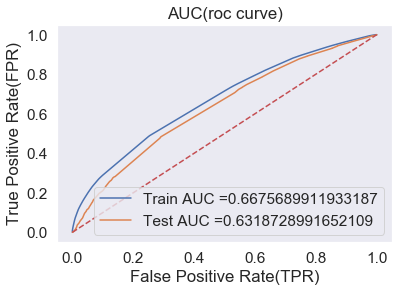

In [317]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

DT = DecisionTreeClassifier(max_depth = depth_hyperparameter_bow, min_samples_split = split_hyperparameter_bow,class_weight='balanced')

DT.fit(x_train_bow, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(DT, x_train_bow)    
y_test_pred = batch_predict(DT, x_test_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

BOW_auc_train = auc(train_fpr, train_tpr)
BOW_auc_test = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC(roc curve)")
plt.grid()
plt.show()

#### Confusion matrix,<font color='red'> SET 1</font>

In [318]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [319]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.36527886023075046 for threshold 0.481
Train confusion matrix
[[ 8595  2950]
 [33070 31856]]
Test confusion matrix
[[ 3546  1451]
 [14361 13416]]


TRAIN confusion matrix
[[ 8595  2950]
 [33070 31856]]


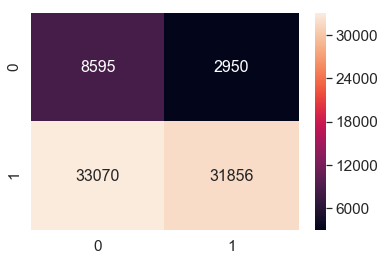

In [320]:
print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

### obtaining false positive data points<font color='red'> SET 1</font>

In [321]:
#conver sparse to dense
bow_test = x_test_bow.todense()
print(bow_test.shape)

#vectorize preprocessed_essays
vectorizer_bow_essay = CountVectorizer(min_df=10)
vectorizer_bow_essay.fit_transform(x_train["preprocessed_essays"])
bow_features = vectorizer_bow_essay.get_feature_names()
len(bow_features)





(32774, 17225)


14504

In [322]:
#find index of fp
y_test_converted = list(y_test[::])

false_positives_index_a = []
fp_count = 0

for i in tqdm(range(len(y_test_pred))):
    if ((y_test_converted[i] == 0) - (y_test_pred[i])).all() <= best_t:
        false_positives_index_a.append(i)
        fp_count = fp_count + 1 
    else :
        continue
        
print(fp_count)
print(x_test.columns)

100%|████████████████████████████████| 32774/32774 [00:00<00:00, 137697.93it/s]


30
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'preprocessed_essays', 'preprocessed_project_title', 'totalwords_title',
       'totalwords_essay', 'sentiment_pos_title', 'sentiment_neg_title',
       'sentiment_neu_title', 'sentiment_compound_title',
       'sentiment_pos_essay', 'sentiment_neg_essay', 'sentiment_neu_essay',
       'sentiment_compound_essay', 'x_test_reject_clean_category',
       'x_test_approved_clean_category', 'x_test_reject_clean_subcategory',
       'x_test_approved_clean_subcategory', 'x_test_reject_grade',
       'x_test_approved_grade', 'x_test_reject_teacher_prefix',
       'x_test_approved_teacher_prefix', 'x_test_reject_scho

In [323]:
false_positives_index_a[0:10]

[80, 1630, 3803, 3871, 5019, 6807, 7276, 8765, 9520, 10122]

In [324]:
df1 = pd.DataFrame(bow_test)
df1_final = df1.iloc[false_positives_index_a,:]
df1_final.shape

(30, 17225)

In [325]:
#number of column
z=len(df1_final.columns)
print(z)
print("*"*30)
print(df1_final[0].sum())

17225
******************************
30.0


In [349]:
df1_final[12506].value_counts()

7.0     7
8.0     6
9.0     4
10.0    4
4.0     2
2.0     2
3.0     1
1.0     1
6.0     1
5.0     1
13.0    1
Name: 12506, dtype: int64

In [344]:
df1_final[12506].shape

(30,)

In [350]:

best_indices_bow = []

for j in range(z):
    
    s = df1_final[j].sum()
    
    if s >= 30 :
        best_indices_bow.append(j)
    else :
        continue


print(len(best_indices_bow))
print("*"*50)
print(best_indices_bow[:])

35
**************************************************
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 21, 286, 2436, 2449, 6152, 7483, 7487, 7929, 8505, 8529, 8730, 11348, 12506, 12661, 13006, 13044, 13806, 14142]


In [351]:
#https://stackoverflow.com/questions/37619848/python-loop-list-index-out-of-range
fp_words_bow = []

for a in best_indices_bow:
    fp_words_bow.append(str(bow_features[a]))

#### Word Cloud for False Positives words<font color='red'> SET 1</font>

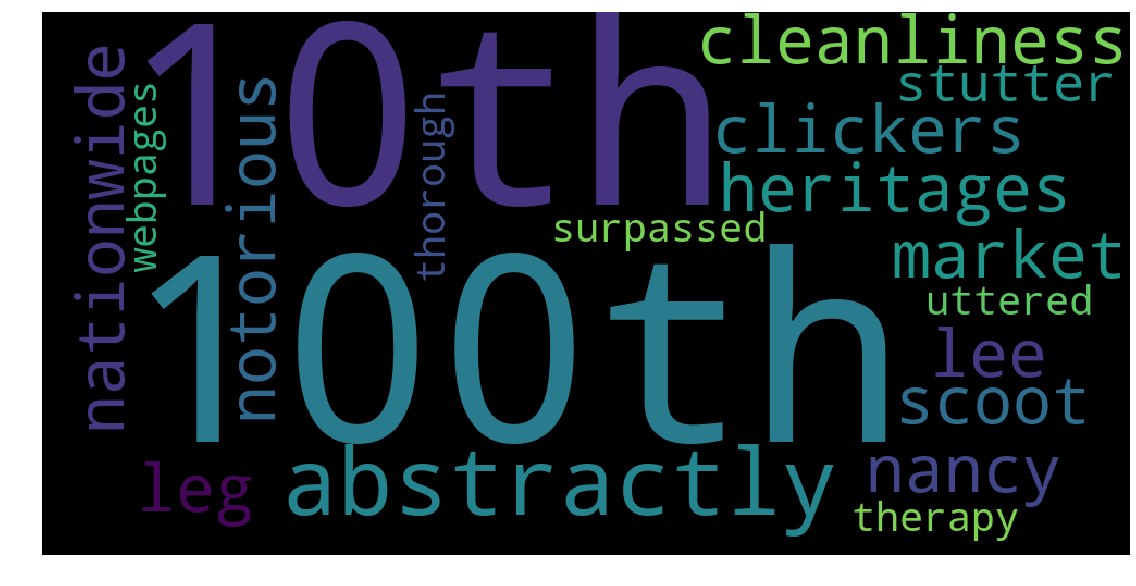

In [352]:
#Word Cloud for False Positives words
#----------------------------------------------
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(fp_words_bow)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

### Box - Plot with the price of these False positive data points<font color='red'> SET 1</font>

30
**************************************************


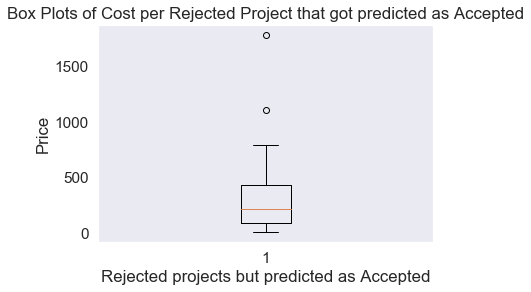

In [354]:
print(len(false_positives_index_a))
print("*"*50)

#select all row of fp index
df2 = pd.DataFrame(x_test['price'])
df2_final = df2.iloc[false_positives_index_a,:]

plt.boxplot(df2_final.values)
plt.title('Box Plots of Cost per Rejected Project that got predicted as Accepted')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

 Majority of the projects that were rejected but predicted as accepted Costs almost less than 400 Dollars.
    
 A Few of them are Extremely costs costing more than 500 Dollars.

### pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`<font color='red'> SET 1</font>





(30, 1)


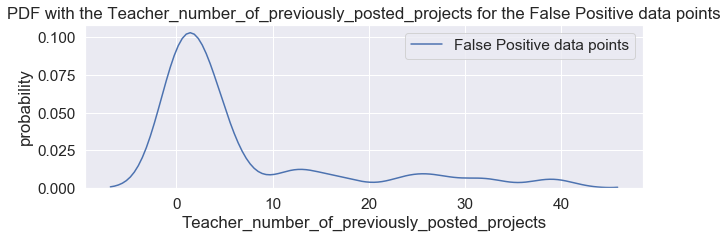

In [355]:
df3 = pd.DataFrame(x_test['teacher_number_of_previously_posted_projects'])
df3_final = df3.iloc[false_positives_index_a,:]
print(df3_final.shape)

plt.figure(figsize=(10,3))
sns.distplot(df3_final.values, hist=False, label="False Positive data points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

Majority of the cases have Teachers with previously posted projects as zero (which is nearly 10% of the total data)

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [356]:
#!pip install graphviz

In [357]:
bow_features_names = []
## Obtain Feature names 

bow_features_names.append("price")
bow_features_names.append("quantity")

bow_features_names.append("teacher_number_of_previously_posted_projects")
bow_features_names.append("totalwords_title")
bow_features_names.append("totalwords_essay")
bow_features_names.append("sentiment_pos_title")
bow_features_names.append("sentiment_neg_title")
bow_features_names.append("sentiment_neu_title")
bow_features_names.append("sentiment_compound_title")
bow_features_names.append("sentiment_pos_essay")
bow_features_names.append("sentiment_neg_essay")
bow_features_names.append("sentiment_neu_essay")
bow_features_names.append("sentiment_compound_essay")
   
                          
bow_features_names.append("cat_reject_clean_category")
bow_features_names.append("cat_approved_clean_category")
bow_features_names.append("cat_reject_clean_subcategory")
bow_features_names.append("cat_approved_clean_subcategory")

bow_features_names.append("cat_reject_grade")
bow_features_names.append("cat_approved_grade")
bow_features_names.append("cat_reject_teacher_prefix")
bow_features_names.append("cat_approved_teacher_prefix")
bow_features_names.append("cat_reject_school_state")
bow_features_names.append("cat_approved_school_state")


for a in vectorizer_title_bow.get_feature_names() :
    bow_features_names.append(a)
for a in vectorizer_essay_bow.get_feature_names() :
    bow_features_names.append(a)
    
print(len(bow_features_names))

17225


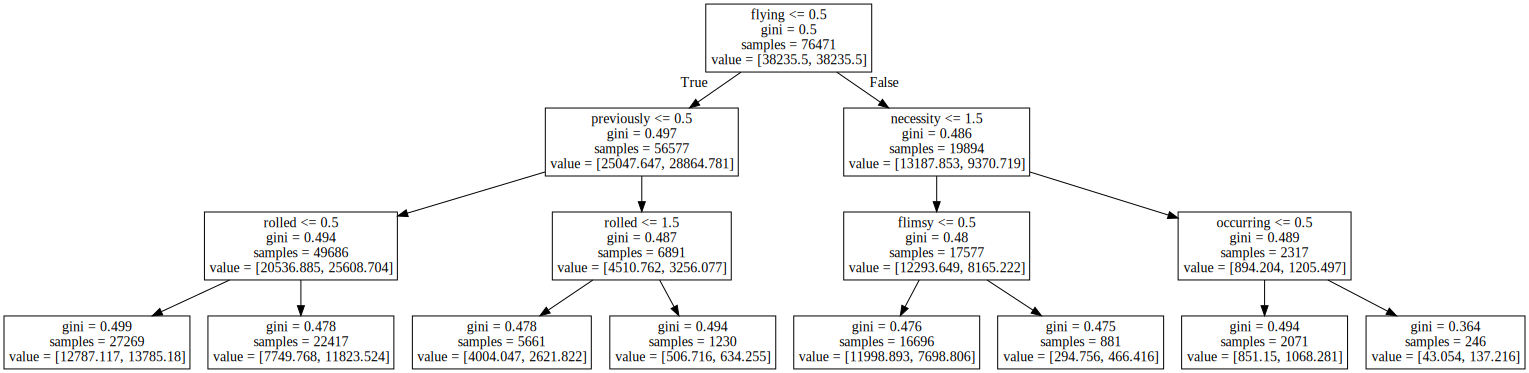

In [358]:
#https://stackoverflow.com/questions/33381594/decisiontreeclassifier-object-has-no-attribute-export-graphviz
#https://scikit-learn.org/stable/modules/tree.html
import graphviz
from sklearn import tree
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier


DT = DecisionTreeClassifier(max_depth = 3, min_samples_split = split_hyperparameter_bow,class_weight='balanced',random_state=0)
clf = DT.fit(x_train_bow, y_train)

# Visualize data
dot_data = tree.export_graphviz(DT, out_file=None, feature_names=bow_features_names)
graph = graphviz.Source(dot_data) 
graph.render("Bow tree",view = True)
graph

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

#### vectorize the essay  and title data,<font color='red'> SET 2</font>

In [178]:
#convert the essay text to vector
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_essay_tfidf = TfidfVectorizer()
vectorizer_essay_tfidf.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data
z_tfidf1=vectorizer_essay_tfidf.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_tfidf_essays = vectorizer_essay_tfidf.transform(x_train['preprocessed_essays'].values)

x_test_tfidf_essays = vectorizer_essay_tfidf.transform(x_test['preprocessed_essays'].values)

print("Shape of matrix after one hot encodig ",x_train_tfidf_essays.shape, y_train.shape)

print("Shape of matrix after one hot encodig ",x_test_tfidf_essays.shape)

Shape of matrix after one hot encodig  (76471, 48972) (76471,)
Shape of matrix after one hot encodig  (32774, 48972)


In [179]:
#convert the title text to vector
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_title_tfidf = TfidfVectorizer()
vectorizer_title_tfidf.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data
z_tfidf2=vectorizer_title_tfidf.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_tfidf_title = vectorizer_title_tfidf.transform(x_train['preprocessed_project_title'].values)

x_test_tfidf_title = vectorizer_title_tfidf.transform(x_test['preprocessed_project_title'].values)

print("Shape of matrix after one hot encodig ",x_train_tfidf_title.shape)

print("Shape of matrix after one hot encodig ",x_test_tfidf_title.shape)

Shape of matrix after one hot encodig  (76471, 14337)
Shape of matrix after one hot encodig  (32774, 14337)


In [180]:
type(x_test_tfidf_title)

scipy.sparse.csr.csr_matrix

#### merge all sparse data,<font color='red'> SET 2</font>

In [371]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_tfidf = hstack((x_train_ohe, x_train_tfidf_essays, x_train_tfidf_title)).tocsr()

x_test_tfidf = hstack((x_test_ohe, x_test_tfidf_essays, x_test_tfidf_title)).tocsr()

print(x_train_tfidf.shape)

print(x_test_tfidf.shape)
print(type(x_train_tfidf))

(76471, 63332)
(32774, 63332)
<class 'scipy.sparse.csr.csr_matrix'>


#### GridsearchCV,<font color='red'> SET 2</font>

In [242]:
#https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/
#https://discuss.analyticsvidhya.com/t/extracting-the-best-fitted-decisiontreeclassifier-after-grid-search/10029
#https://www.kaggle.com/shotashimizu/09-decisiontree-gridsearchcv
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

%time
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

print("***************Grid search cv perform on train dataset******************")

DT = DecisionTreeClassifier(class_weight='balanced')
#params we need to try on classifier
param_grid = {'max_depth':[1, 5, 10, 50, 100, 500, 100],
              'min_samples_split':[5, 10, 100, 500]}
ts_cv = TimeSeriesSplit(n_splits=10) #For time based splitting
grid_bow = GridSearchCV(DT,param_grid,cv=ts_cv,verbose=1,n_jobs=-1,scoring='roc_auc',return_train_score=True)
grid_bow.fit(x_train_tfidf,y_train)

split_hyperparameter_tfidf=grid_bow.best_params_['min_samples_split']
depth_hyperparameter_tfidf=grid_bow.best_params_['max_depth']

#savetofile(gsv,"Log Reg/gsv_uni")
print("Best HyperParameter: ",grid_bow.best_params_)

train_auc= grid_bow.cv_results_['mean_train_score']
train_auc_std= grid_bow.cv_results_['std_train_score']
cv_auc = grid_bow.cv_results_['mean_test_score'] 
cv_auc_std= grid_bow.cv_results_['std_test_score']

print("----------------------------------------------------")

Wall time: 0 ns
***************Grid search cv perform on train dataset******************
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed: 39.4min finished


Best HyperParameter:  {'max_depth': 10, 'min_samples_split': 500}
----------------------------------------------------


### 3D plot of AUC with hyperparameter

In [243]:
import plotly
plotly.tools.set_credentials_file(username='Rana_Singh', api_key='jZjhDgnliBgNu6jqwfR7')
import plotly.plotly as py
import plotly.graph_objs as go

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



In [244]:
z1= list(train_auc)
x1 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500])
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500])

In [245]:
trace = go.Scatter3d(
    x=x1, y=y1, z=z1,
    marker=dict(
        size=4,
        color=z1,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

In [246]:
data = [trace]
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [513]:
fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Decision-trees-tfidf', height=700)

C:\Users\IDM LAB-09\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



#### ROC of tain , test and cv dataset,<font color='red'> SET 2</font>

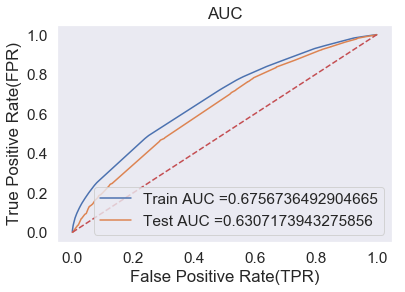

In [390]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

DT = DecisionTreeClassifier(max_depth = depth_hyperparameter_tfidf, min_samples_split = split_hyperparameter_tfidf,class_weight='balanced')

DT.fit(x_train_tfidf, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(DT, x_train_tfidf)    
y_test_pred = batch_predict(DT, x_test_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

TFIDF_auc_train = auc(train_fpr, train_tpr)
TFIDF_auc_test = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()



#### Confusion matrix,<font color='red'> SET 2</font>

In [391]:
x_test_tfidf.shape

(32774, 63332)

In [392]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
  

In [393]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.3736430935858256 for threshold 0.497
Train confusion matrix
[[ 6064  5481]
 [18740 46186]]
Test confusion matrix
[[ 2410  2587]
 [ 8349 19428]]


TRAIN confusion matrix
[[ 6064  5481]
 [18740 46186]]


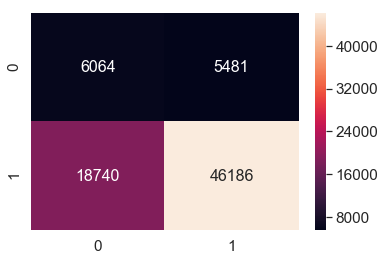

In [394]:
print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

#### obtaining false positive data points<font color='red'> SET 2</font>

In [395]:
x_test_tfidf.shape

(32774, 63332)

In [500]:
#conver sparse to dense
tfidf_test = x_test_tfidf.todense()
tfidf_test.shape




In [397]:
#find index of fp
y_test_converted = list(y_test[::])


false_positives_index_b = []
fp_count = 0

for i in tqdm(range(len(y_test_pred))):
    if y_test_converted[i] == 0 and y_test_pred[i] <= best_t:
        false_positives_index_b.append(i)
        fp_count = fp_count + 1 
    else :
        continue
        
print(fp_count)


100%|███████████████████████████████| 32774/32774 [00:00<00:00, 2184813.87it/s]


3477


In [398]:
#get feature name vectorize preprocessed_essays
vectorizer_tfidf_essay = TfidfVectorizer()
vectorizer_tfidf_essay.fit_transform(x_train["preprocessed_essays"])

tfidf_features = vectorizer_tfidf_essay.get_feature_names()
len(tfidf_features)

48972

In [399]:
type(tfidf_test)

numpy.matrix

In [400]:
import pandas as pd
df2 = pd.DataFrame(tfidf_test)
df2_final = df2.iloc[false_positives_index_b,:]
df2_final.shape

(3477, 63332)

In [401]:
#number of column
z=len(df2_final.columns)
print(z)
print("*"*30)
print(df2_final[0].sum())





63332
******************************
3477.0


In [419]:
best_indices_tfidf = []

for j in range(z):
    
    s = df2_final[j].sum()
    
    if s >= 100 :
        best_indices_tfidf.append(j)
    else :
        continue


print(len(best_indices_tfidf))
print("*"*50)
print(best_indices_tfidf[0:10])

33
**************************************************
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [420]:
fp_words_tfidf = []

for a in best_indices_tfidf:
    fp_words_tfidf.append((tfidf_features[a]))

#### Word Cloud for False Positives words<font color='red'> SET 2</font>

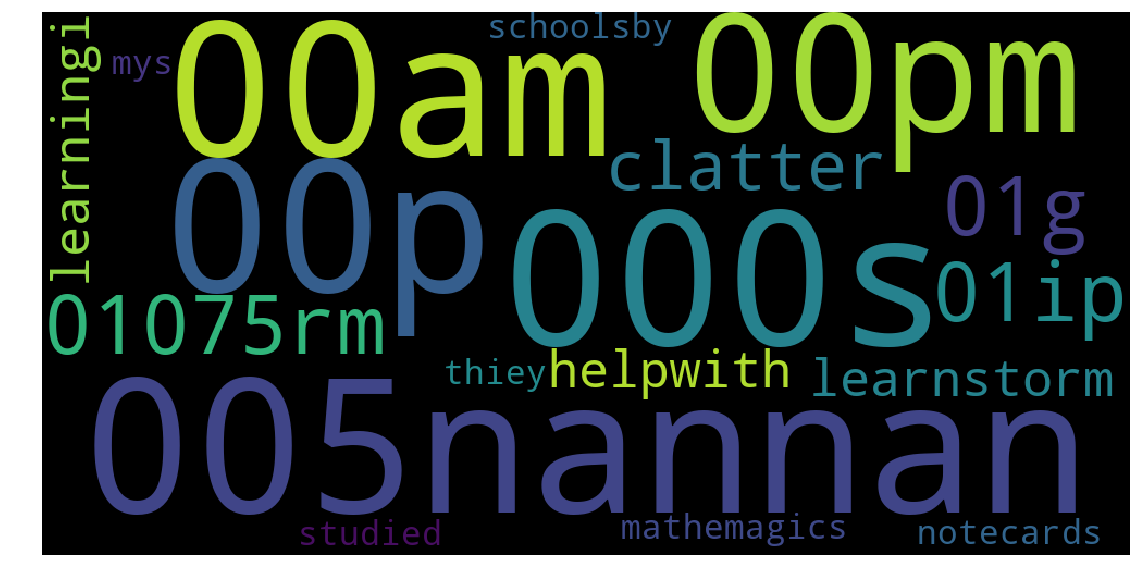

In [423]:
#Word Cloud for False Positives words
#----------------------------------------------
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(fp_words_tfidf)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

#### Box - Plot with the price of these False positive data points<font color='red'> SET 2</font>

30
**************************************************


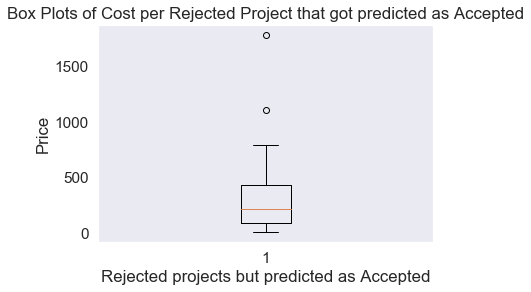

In [424]:

print(len(false_positives_index_a))
print("*"*50)

#select all row of fp index
df2 = pd.DataFrame(x_test['price'])
df2_fina1 = df2.iloc[false_positives_index_a,:]

plt.boxplot(df2_fina1.values)
plt.title('Box Plots of Cost per Rejected Project that got predicted as Accepted')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

 Majority of the projects that were rejected but predicted as accepted Costs almost less than 300 Dollars.
    
 A Few of them are Extremely costs costing more than 500 Dollars.

#### pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`<font color='red'> SET 2</font>

(30, 1)


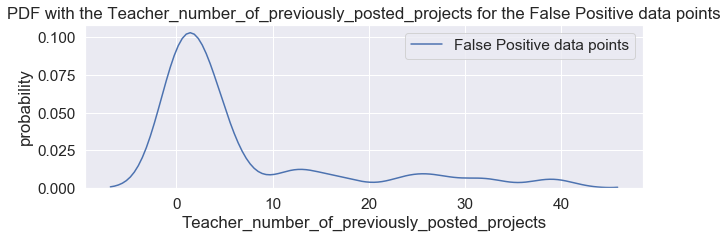

In [425]:
df3 = pd.DataFrame(x_test['teacher_number_of_previously_posted_projects'])
df3_final = df3.iloc[false_positives_index_a,:]
print(df3_final.shape)

plt.figure(figsize=(10,3))
sns.distplot(df3_final.values, hist=False, label="False Positive data points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

Majority of the cases have Teachers with previously posted projects as zero (which is nearly 10% of the total data)

####  Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [426]:
x_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'preprocessed_essays', 'preprocessed_project_title', 'totalwords_title',
       'totalwords_essay', 'sentiment_pos_title', 'sentiment_neg_title',
       'sentiment_neu_title', 'sentiment_compound_title',
       'sentiment_pos_essay', 'sentiment_neg_essay', 'sentiment_neu_essay',
       'sentiment_compound_essay', 'x_train_reject_clean_category',
       'x_train_approved_clean_category', 'x_train_reject_clean_subcategory',
       'x_train_approved_clean_subcategory', 'x_train_reject_grade',
       'x_train_approved_grade', 'x_train_reject_teacher_prefix',
       'x_train_approved_teacher_prefix', 'x_train_rejec

In [427]:
tfidf_features_names = []
## Obtain Feature names 

tfidf_features_names.append("price")
tfidf_features_names.append("quantity")

tfidf_features_names.append("teacher_number_of_previously_posted_projects")
tfidf_features_names.append("totalwords_title")
tfidf_features_names.append("totalwords_essay")
tfidf_features_names.append("sentiment_pos_title")
tfidf_features_names.append("sentiment_neg_title")
tfidf_features_names.append("sentiment_neu_title")
tfidf_features_names.append("sentiment_compound_title")
tfidf_features_names.append("sentiment_pos_essay")
tfidf_features_names.append("sentiment_neg_essay")
tfidf_features_names.append("sentiment_neu_essay")
tfidf_features_names.append("sentiment_compound_essay")
   
                          
tfidf_features_names.append("cat_reject_clean_category")
tfidf_features_names.append("cat_approved_clean_category")
tfidf_features_names.append("cat_reject_clean_subcategory")
tfidf_features_names.append("cat_approved_clean_subcategory")

tfidf_features_names.append("cat_reject_grade")
tfidf_features_names.append("cat_approved_grade")
tfidf_features_names.append("cat_reject_teacher_prefix")
tfidf_features_names.append("cat_approved_teacher_prefix")
tfidf_features_names.append("cat_reject_school_state")
tfidf_features_names.append("cat_approved_school_state")


for a in vectorizer_title_tfidf.get_feature_names() :
    tfidf_features_names.append(a)
for a in vectorizer_essay_tfidf.get_feature_names() :
    tfidf_features_names.append(a)
    
print(len(tfidf_features_names))

63332


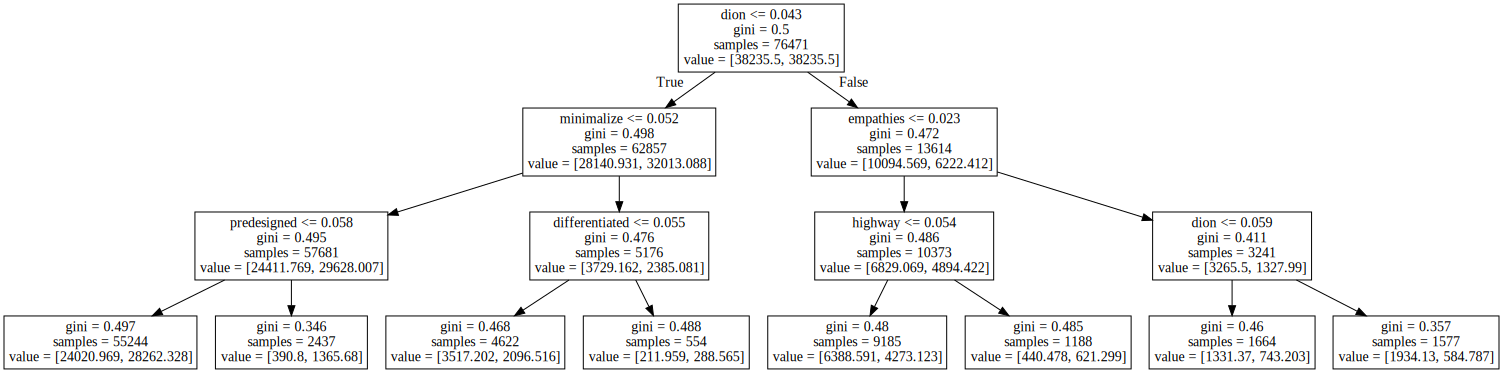

In [428]:
#https://stackoverflow.com/questions/33381594/decisiontreeclassifier-object-has-no-attribute-export-graphviz
#https://scikit-learn.org/stable/modules/tree.html
import graphviz
from sklearn import tree
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier


DT = DecisionTreeClassifier(max_depth = 3, min_samples_split = split_hyperparameter_tfidf,class_weight='balanced',random_state=0)
clf = DT.fit(x_train_tfidf, y_train)

# Visualize data
dot_data = tree.export_graphviz(DT, out_file=None, feature_names=tfidf_features_names)
graph = graphviz.Source(dot_data) 
graph.render("TFIDF tree",view = True)
graph

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

#### vectorize using AVG W2V,<font color='red'> SET 3</font>

In [0]:

'''# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!
# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)'''




'# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(words)\n

In [188]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [189]:
#!pip install tqdm

In [190]:
# Using Pretrained Models: AVG W2V on `essay`
#_______________________________________________

# -----average Word2Vec on train
# compute average word2vec for each review.
avg_w2v_vectors_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_train.append(vector)

print(len(avg_w2v_vectors_essays_train))
print(len(avg_w2v_vectors_essays_train[0]))

100%|██████████████████████████████████| 76471/76471 [00:24<00:00, 3117.02it/s]


76471
300


In [191]:
type(avg_w2v_vectors_essays_train)

list

In [192]:
'''# -----average Word2Vec on CV
# compute average word2vec for each review.
avg_w2v_vectors_essays_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_cv.append(vector)

print(len(avg_w2v_vectors_essays_cv))
print(len(avg_w2v_vectors_essays_cv[0]))'''

"# -----average Word2Vec on CV\n# compute average word2vec for each review.\navg_w2v_vectors_essays_cv = []; # the avg-w2v for each sentence/review is stored in this list\nfor sentence in tqdm(x_cv['preprocessed_essays']): # for each review/sentence\n    vector = np.zeros(300) # as word vectors are of zero length\n    cnt_words =0; # num of words with a valid vector in the sentence/review\n    for word in sentence.split(): # for each word in a review/sentence\n        if word in glove_words:\n            vector += model[word]\n            cnt_words += 1\n    if cnt_words != 0:\n        vector /= cnt_words\n    avg_w2v_vectors_essays_cv.append(vector)\n\nprint(len(avg_w2v_vectors_essays_cv))\nprint(len(avg_w2v_vectors_essays_cv[0]))"

In [193]:
# -----average Word2Vec on test
# compute average word2vec for each review.
avg_w2v_vectors_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_test.append(vector)

print(len(avg_w2v_vectors_essays_test))
print(len(avg_w2v_vectors_essays_test[0]))

100%|██████████████████████████████████| 32774/32774 [00:09<00:00, 3415.54it/s]


32774
300


In [194]:
# Using Pretrained Models: AVG W2V on `project_title`
#_____________________________________________________

# ------average Word2Vec on train
# compute average word2vec for each review.
avg_w2v_vectors_project_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_train.append(vector)

print(len(avg_w2v_vectors_project_title_train))
print(len(avg_w2v_vectors_project_title_train[0]))

100%|█████████████████████████████████| 76471/76471 [00:01<00:00, 42694.94it/s]


76471
300


In [195]:
'''# ------average Word2Vec on cv
# compute average word2vec for each review.
avg_w2v_vectors_project_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_cv['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_cv.append(vector)

print(len(avg_w2v_vectors_project_title_cv))
print(len(avg_w2v_vectors_project_title_cv[0]))'''

"# ------average Word2Vec on cv\n# compute average word2vec for each review.\navg_w2v_vectors_project_title_cv = []; # the avg-w2v for each sentence/review is stored in this list\nfor sentence in tqdm(x_cv['preprocessed_project_title']): # for each review/sentence\n    vector = np.zeros(300) # as word vectors are of zero length\n    cnt_words =0; # num of words with a valid vector in the sentence/review\n    for word in sentence.split(): # for each word in a review/sentence\n        if word in glove_words:\n            vector += model[word]\n            cnt_words += 1\n    if cnt_words != 0:\n        vector /= cnt_words\n    avg_w2v_vectors_project_title_cv.append(vector)\n\nprint(len(avg_w2v_vectors_project_title_cv))\nprint(len(avg_w2v_vectors_project_title_cv[0]))"

In [196]:
# ------average Word2Vec on test
# compute average word2vec for each review.
avg_w2v_vectors_project_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_test.append(vector)

print(len(avg_w2v_vectors_project_title_test))
print(len(avg_w2v_vectors_project_title_test[0]))

100%|█████████████████████████████████| 32774/32774 [00:00<00:00, 45707.29it/s]


32774
300


#### merge all sparse data,<font color='red'> SET 3</font>

In [197]:
'''#converting list to array
from numpy  import array
avg_w2v_vectors_essays_train=array(avg_w2v_vectors_essays_train)
avg_w2v_vectors_project_title_train=array(avg_w2v_vectors_project_title_train)
avg_w2v_vectors_essays_cv=array(avg_w2v_vectors_essays_cv)
avg_w2v_vectors_project_title_cv=array(avg_w2v_vectors_project_title_cv)
avg_w2v_vectors_essays_test=array(avg_w2v_vectors_essays_test)
avg_w2v_vectors_project_title_test=array(avg_w2v_vectors_project_title_test)

print(avg_w2v_vectors_essays_train.shape)
print(avg_w2v_vectors_project_title_train.shape)
print(avg_w2v_vectors_essays_cv.shape)
print(avg_w2v_vectors_project_title_cv.shape)
print(avg_w2v_vectors_essays_test.shape)
print(avg_w2v_vectors_project_title_test.shape)
print(x_train_ohe.shape)
print(x_cv_ohe.shape)
print(x_test_ohe.shape)'''

'#converting list to array\nfrom numpy  import array\navg_w2v_vectors_essays_train=array(avg_w2v_vectors_essays_train)\navg_w2v_vectors_project_title_train=array(avg_w2v_vectors_project_title_train)\navg_w2v_vectors_essays_cv=array(avg_w2v_vectors_essays_cv)\navg_w2v_vectors_project_title_cv=array(avg_w2v_vectors_project_title_cv)\navg_w2v_vectors_essays_test=array(avg_w2v_vectors_essays_test)\navg_w2v_vectors_project_title_test=array(avg_w2v_vectors_project_title_test)\n\nprint(avg_w2v_vectors_essays_train.shape)\nprint(avg_w2v_vectors_project_title_train.shape)\nprint(avg_w2v_vectors_essays_cv.shape)\nprint(avg_w2v_vectors_project_title_cv.shape)\nprint(avg_w2v_vectors_essays_test.shape)\nprint(avg_w2v_vectors_project_title_test.shape)\nprint(x_train_ohe.shape)\nprint(x_cv_ohe.shape)\nprint(x_test_ohe.shape)'

In [198]:
print(type(x_train_ohe))
print(type(avg_w2v_vectors_essays_train))
print(type(avg_w2v_vectors_project_title_train))


<class 'numpy.ndarray'>
<class 'list'>
<class 'list'>


In [205]:
#https://stackoverflow.com/questions/43977463/valueerror-could-not-broadcast-input-array-from-shape-224-224-3-into-shape-2
#https://stackoverflow.com/questions/5951135/how-to-save-a-list-as-numpy-array-in-python
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)

x_train_AVGW2V = np.hstack((x_train_ohe, avg_w2v_vectors_essays_train, avg_w2v_vectors_project_title_train))

x_test_AVGW2V = np.hstack((x_test_ohe, avg_w2v_vectors_essays_test, avg_w2v_vectors_project_title_test))

print(x_train_AVGW2V.shape)

print(x_test_AVGW2V.shape)

(76471, 623)
(32774, 623)


In [206]:
type(x_test_AVGW2V)

numpy.ndarray

#### GridsearchCV,<font color='red'> SET 3</font>

In [235]:
%time
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

print("***************Grid search cv perform on train dataset******************")

DT = DecisionTreeClassifier(class_weight='balanced')
#params we need to try on classifier
param_grid = {'max_depth':[1, 5, 10, 50, 100, 500, 100],
              'min_samples_split':[5, 10, 100, 500]}
ts_cv = TimeSeriesSplit(n_splits=10) #For time based splitting
grid_bow = GridSearchCV(DT,param_grid,cv=ts_cv,verbose=1,n_jobs=-1,scoring='roc_auc',return_train_score=True)
grid_bow.fit(x_train_AVGW2V,y_train)

split_hyperparameter_AVGW2V=grid_bow.best_params_['min_samples_split']
depth_hyperparameter_AVGW2V=grid_bow.best_params_['max_depth']

#savetofile(gsv,"Log Reg/gsv_uni")
print("Best HyperParameter: ",grid_bow.best_params_)


train_auc= grid_bow.cv_results_['mean_train_score']
train_auc_std= grid_bow.cv_results_['std_train_score']
cv_auc = grid_bow.cv_results_['mean_test_score'] 
cv_auc_std= grid_bow.cv_results_['std_test_score']

print("----------------------------------------------------")

Wall time: 0 ns
***************Grid search cv perform on train dataset******************
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed: 34.2min finished


Best HyperParameter:  {'max_depth': 5, 'min_samples_split': 500}
----------------------------------------------------


### 3D plot of AUC with hyperparameter

In [236]:
import plotly
plotly.tools.set_credentials_file(username='Rana_Singh', api_key='jZjhDgnliBgNu6jqwfR7')
import plotly.plotly as py
import plotly.graph_objs as go

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



In [237]:
z1= list(train_auc)
x1 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500])
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500])

In [238]:
trace = go.Scatter3d(
    x=x1, y=y1, z=z1,
    marker=dict(
        size=4,
        color=z1,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)

In [239]:
data = [trace]
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

In [240]:

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Decision-trees-AVGW2V', height=700)

C:\Users\IDM LAB-09\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



#### ROC of tain , test and cv dataset,<font color='red'> SET 3</font>

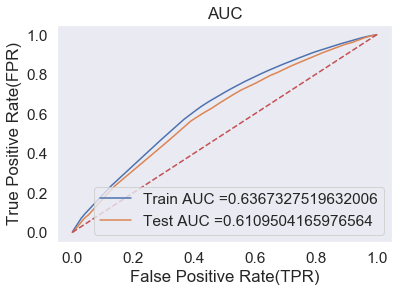

In [429]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

DT = DecisionTreeClassifier(max_depth = depth_hyperparameter_AVGW2V, min_samples_split = split_hyperparameter_AVGW2V,class_weight='balanced')

DT.fit(x_train_AVGW2V, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(DT, x_train_AVGW2V)    
y_test_pred = batch_predict(DT, x_test_AVGW2V)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

AVGW2V_auc_train = auc(train_fpr, train_tpr)
AVGW2V_auc_test = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()



#### Confusion matrix,<font color='red'> SET 3</font>

In [432]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


the maximum value of tpr*(1-fpr) 0.367179532251442 for threshold 0.528
TRAIN confusion matrix
[[ 6657  4888]
 [23582 41344]]


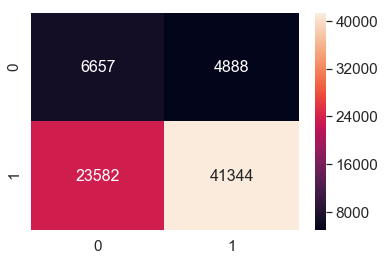

In [433]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

Test confusion matrix
[[ 2697  2300]
 [10279 17498]]


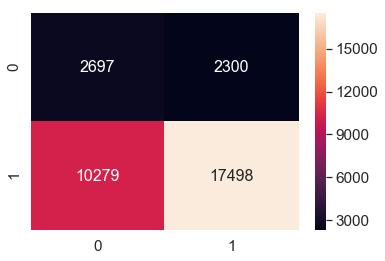

In [434]:
  

print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))


conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

#### obtaining false positive data points<font color='red'> SET 3</font>

In [435]:
#conver sparse to dense
AVGW2V_test = x_test_AVGW2V
AVGW2V_test.shape



(32774, 623)

In [436]:
#find index of fp
y_test_converted = list(y_test[::])


false_positives_index_b = []
fp_count = 0

for i in tqdm(range(len(y_test_pred))):
    if y_test_converted[i] == 0 and y_test_pred[i] <= best_t:
        false_positives_index_b.append(i)
        fp_count = fp_count + 1 
    else :
        continue
        
print(fp_count)


100%|███████████████████████████████| 32774/32774 [00:00<00:00, 2340890.61it/s]


2804


In [437]:
#get feature name vectorize preprocessed_essays
vectorizer_AVGW2V_essay = TfidfVectorizer()
vectorizer_AVGW2V_essay.fit_transform(x_train["preprocessed_essays"])

AVGW2V_features = vectorizer_AVGW2V_essay.get_feature_names()
len(AVGW2V_features)

48972

In [438]:
import pandas as pd
df2 = pd.DataFrame(x_test_AVGW2V)
df2_final = df2.iloc[false_positives_index_b,:]
df2_final.shape





(2804, 623)

In [439]:
#number of column
z=len(df2_final.columns)
print(z)
print("*"*30)
print(df2_final[0].sum())


623
******************************
2804.0


In [440]:

best_indices_AVGW2V = []

for j in range(z):
    
    s = df2_final[j].sum()
    
    if s >= 100 :
        best_indices_AVGW2V.append(j)
    else :
        continue


print(len(best_indices_AVGW2V))
print("*"*50)
print(best_indices_AVGW2V[0:10])

193
**************************************************
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [441]:
fp_words_AVGW2V = []

for a in best_indices_AVGW2V:
    fp_words_AVGW2V.append(str(AVGW2V_features[a]))

### Word cloud for false positive class

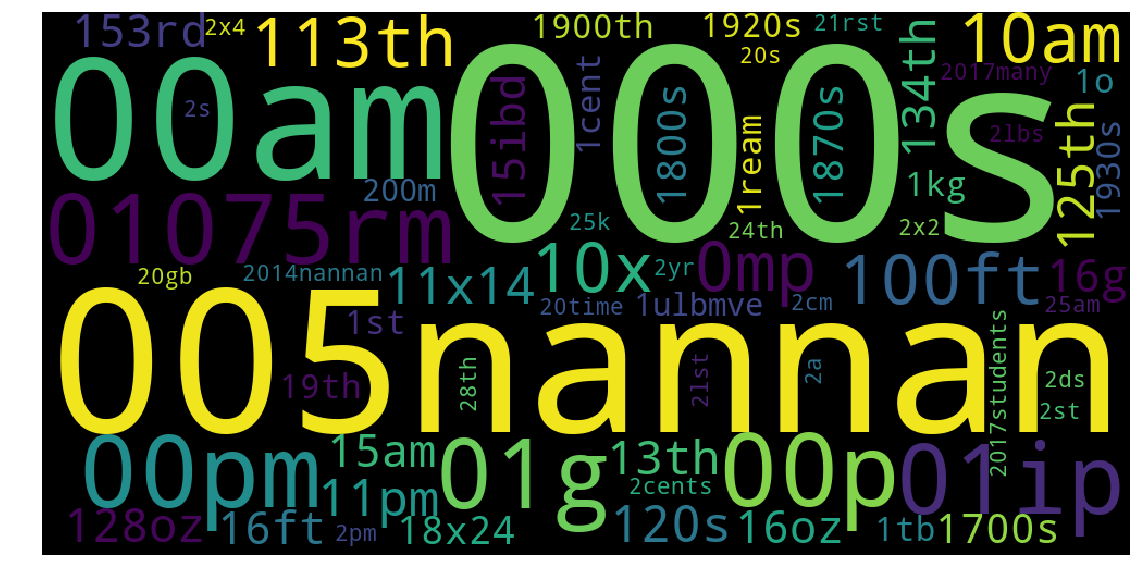

In [442]:
#Word Cloud for False Positives words
#----------------------------------------------
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(fp_words_AVGW2V)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

#### Box - Plot with the price of these False positive data points<font color='red'> SET 3</font>

2804
**************************************************


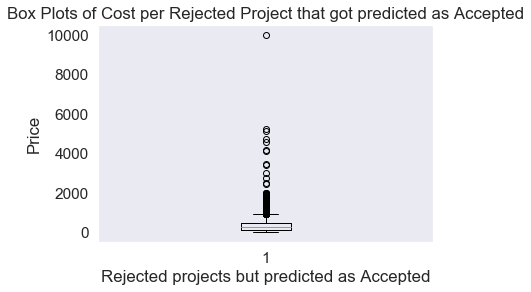

In [443]:

print(len(false_positives_index_b))
print("*"*50)

#select all row of fp index
df2 = pd.DataFrame(x_test['price'])
df2_fina1 = df2.iloc[false_positives_index_b,:]

plt.boxplot(df2_fina1.values)
plt.title('Box Plots of Cost per Rejected Project that got predicted as Accepted')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

 Majority of the projects that were rejected but predicted as accepted Costs almost less than 1000 Dollars.
    
 A Few of them are Extremely costs costing more than 4000 Dollars.

#### pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`<font color='red'> SET 3</font>

(2804, 1)


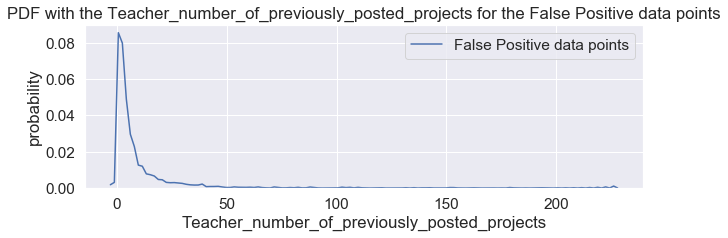

In [444]:
df3 = pd.DataFrame(x_test['teacher_number_of_previously_posted_projects'])
df3_final = df3.iloc[false_positives_index_b,:]
print(df3_final.shape)

plt.figure(figsize=(10,3))
sns.distplot(df3_final.values, hist=False, label="False Positive data points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

Majority of the cases have Teachers with previously posted projects as zero (which is nearly 10% of the total data)

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

#### Vectorize using TFIDF W2V,<font color='red'> SET 4</font>

In [217]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


In [218]:
#Using Pretrained Models: TFIDFW weighted W2V on `essay
#___________________________________

# average Word2Vec---train
# compute average word2vec for each review.
tfidf_w2v_vectors_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays_train.append(vector)

print(len(tfidf_w2v_vectors_essays_train))
print(len(tfidf_w2v_vectors_essays_train[0]))

100%|███████████████████████████████████| 76471/76471 [02:42<00:00, 471.29it/s]


76471
300


In [219]:
'''# average Word2Vec---cv
# compute average word2vec for each review.
tfidf_w2v_vectors_essays_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_cv['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays_cv.append(vector)

print(len(tfidf_w2v_vectors_essays_cv))
print(len(tfidf_w2v_vectors_essays_cv[0]))'''

"# average Word2Vec---cv\n# compute average word2vec for each review.\ntfidf_w2v_vectors_essays_cv = []; # the avg-w2v for each sentence/review is stored in this list\nfor sentence in tqdm(x_cv['preprocessed_essays']): # for each review/sentence\n    vector = np.zeros(300) # as word vectors are of zero length\n    tf_idf_weight =0; # num of words with a valid vector in the sentence/review\n    for word in sentence.split(): # for each word in a review/sentence\n        if (word in glove_words) and (word in tfidf_words):\n            vec = model[word] # getting the vector for each word\n            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))\n            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word\n            vector += (vec * tf_idf) # calculating tfidf weighted w2v\n            tf_idf_weight += tf_idf\n    if tf_idf_weight != 0:\n        vector /= 

In [220]:
# average Word2Vec---test
# compute average word2vec for each review.
tfidf_w2v_vectors_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essays_test.append(vector)

print(len(tfidf_w2v_vectors_essays_test))
print(len(tfidf_w2v_vectors_essays_test[0]))

100%|███████████████████████████████████| 32774/32774 [01:08<00:00, 479.07it/s]


32774
300


In [221]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['preprocessed_project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [222]:
#Using Pretrained Models: TFIDFW weighted W2V on "preprocessed_project_title"
#___________________________________________
# average Word2Vec--train
# compute average word2vec for each review.
tfidf_w2v_vectors_project_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_train.append(vector)

print(len(tfidf_w2v_vectors_project_title_train))
print(len(tfidf_w2v_vectors_project_title_train[0]))

100%|█████████████████████████████████| 76471/76471 [00:02<00:00, 31046.13it/s]


76471
300


In [223]:
'''# average Word2Vec--cv
# compute average word2vec for each review.
tfidf_w2v_vectors_project_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_cv['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_cv.append(vector)

print(len(tfidf_w2v_vectors_project_title_cv))
print(len(tfidf_w2v_vectors_project_title_cv[0]))'''

"# average Word2Vec--cv\n# compute average word2vec for each review.\ntfidf_w2v_vectors_project_title_cv = []; # the avg-w2v for each sentence/review is stored in this list\nfor sentence in tqdm(x_cv['preprocessed_project_title']): # for each review/sentence\n    vector = np.zeros(300) # as word vectors are of zero length\n    tf_idf_weight =0; # num of words with a valid vector in the sentence/review\n    for word in sentence.split(): # for each word in a review/sentence\n        if (word in glove_words) and (word in tfidf_words):\n            vec = model[word] # getting the vector for each word\n            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))\n            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word\n            vector += (vec * tf_idf) # calculating tfidf weighted w2v\n            tf_idf_weight += tf_idf\n    if tf_idf_weight != 0:\n     

In [224]:
# average Word2Vec--test
# compute average word2vec for each review.
tfidf_w2v_vectors_project_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_test.append(vector)

print(len(tfidf_w2v_vectors_project_title_test))
print(len(tfidf_w2v_vectors_project_title_test[0]))

100%|█████████████████████████████████| 32774/32774 [00:01<00:00, 32544.31it/s]


32774
300


#### merge all aparse data,<font color='red'> SET 4</font>

In [225]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_TFIDFW2V = np.hstack((x_train_ohe, tfidf_w2v_vectors_essays_train, tfidf_w2v_vectors_project_title_train))
#x_cv_TFIDFW2V = np.hstack((x_cv_ohe, tfidf_w2v_vectors_essays_cv, tfidf_w2v_vectors_project_title_cv))
x_test_TFIDFW2V = np.hstack((x_test_ohe, tfidf_w2v_vectors_essays_test, tfidf_w2v_vectors_project_title_test))

print(x_train_TFIDFW2V.shape)
#print(x_cv_TFIDFW2V.shape)
print(x_test_TFIDFW2V.shape)

(76471, 623)
(32774, 623)


#### GridsearchCV,<font color='red'> SET 4</font>

In [227]:
%time
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

print("***************Grid search cv perform on train dataset******************")

DT = DecisionTreeClassifier(class_weight='balanced')
#params we need to try on classifier
param_grid = {'max_depth':[1, 5, 10, 50, 100, 500, 1000],
              'min_samples_split':[5, 10, 100, 500,1000]}
ts_cv = TimeSeriesSplit(n_splits=10) #For time based splitting
grid_bow = GridSearchCV(DT,param_grid,cv=ts_cv,verbose=1,n_jobs=-1,scoring='roc_auc',return_train_score=True)
grid_bow.fit(x_train_TFIDFW2V,y_train)

split_hyperparameter_TFIDFW2V=grid_bow.best_params_['min_samples_split']
depth_hyperparameter_TFIDFW2V=grid_bow.best_params_['max_depth']

#savetofile(gsv,"Log Reg/gsv_uni")
print("Best HyperParameter: ",grid_bow.best_params_)



train_auc= grid_bow.cv_results_['mean_train_score']
train_auc_std= grid_bow.cv_results_['std_train_score']
cv_auc = grid_bow.cv_results_['mean_test_score'] 
cv_auc_std= grid_bow.cv_results_['std_test_score']

print("----------------------------------------------------")

Wall time: 0 ns
***************Grid search cv perform on train dataset******************
Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed: 40.4min finished


Best HyperParameter:  {'max_depth': 5, 'min_samples_split': 1000}
----------------------------------------------------


### 3D plot of AUC with Hyperparameter

In [228]:
import plotly
plotly.tools.set_credentials_file(username='Rana_Singh', api_key='jZjhDgnliBgNu6jqwfR7')
import plotly.plotly as py
import plotly.graph_objs as go

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d



z1= list(train_auc)
x1 = pd.Series([1,1,1,1,5,5,5,5,10,10,10,10,50,50,50,50,100,100,100,100,500,500,500,500])
y1 = pd.Series([5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500,5,10,100,500])


In [229]:
trace = go.Scatter3d(
    x=x1, y=y1, z=z1,
    marker=dict(
        size=4,
        color=z1,
        colorscale='Viridis',
    ),
    line=dict(
        color='#1f77b4',
        width=1
    )
)


In [230]:

data = [trace]
layout = dict(
    width=800,
    height=700,
    autosize=False,
    title='Hyper Parameter Tuning -- TRAIN Data',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)


In [231]:


fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Decision-trees-TFIDFW2V', height=700)

C:\Users\IDM LAB-09\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



#### ROC of tain , test and cv dataset,<font color='red'> SET 4</font>

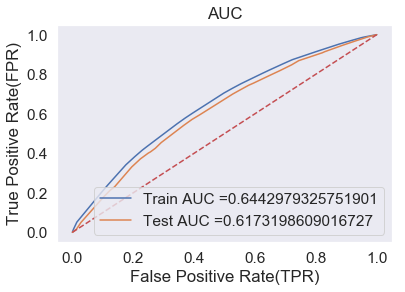

In [445]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

DT = DecisionTreeClassifier(max_depth = depth_hyperparameter_TFIDFW2V, min_samples_split = split_hyperparameter_TFIDFW2V,class_weight='balanced')

DT.fit(x_train_TFIDFW2V, y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(DT, x_train_TFIDFW2V)    
y_test_pred = batch_predict(DT, x_test_TFIDFW2V)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

TFIDFW2V_auc_train = auc(train_fpr, train_tpr)
TFIDFW2V_auc_test = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()



#### Confusion matrix,<font color='red'> SET 4</font>

In [446]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#------------------------------------------------
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
  


In [447]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

the maximum value of tpr*(1-fpr) 0.3648798358132129 for threshold 0.506


TRAIN confusion matrix
[[ 6993  4552]
 [25815 39111]]


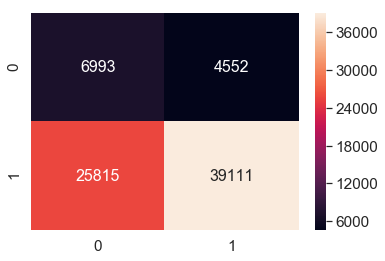

In [448]:
print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

Test confusion matrix
[[ 2900  2097]
 [11230 16547]]


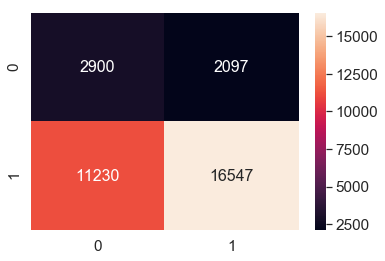

In [449]:
  
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))


conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

#### obtaining false positive data points<font color='red'> SET 4</font>

In [450]:
#conver sparse to dense
TFIDFW2V_test = x_test_TFIDFW2V
TFIDFW2V_test.shape




(32774, 623)

In [451]:
type(x_test_TFIDFW2V)

numpy.ndarray

In [452]:
#find index of fp
y_test_converted = list(y_test[::])


false_positives_index_b = []
fp_count = 0

for i in tqdm(range(len(y_test_pred))):
    if y_test_converted[i] == 0 and y_test_pred[i] <= best_t:
        false_positives_index_b.append(i)
        fp_count = fp_count + 1 
    else :
        continue
        
print(fp_count)




100%|███████████████████████████████| 32774/32774 [00:00<00:00, 1057164.21it/s]


3033


In [453]:
#get feature name vectorize preprocessed_essays
vectorizer_TFIDFW2V_essay = TfidfVectorizer()
vectorizer_TFIDFW2V_essay.fit_transform(x_train["preprocessed_essays"])

TFIDFW2V_features = vectorizer_TFIDFW2V_essay.get_feature_names()
len(TFIDFW2V_features)

48972

In [454]:
import pandas as pd
df2 = pd.DataFrame(x_test_TFIDFW2V)
df2_final = df2.iloc[false_positives_index_b,:]
df2_final.shape


(3033, 623)

In [455]:

#number of column
z=len(df2_final.columns)
print(z)
print("*"*30)
print(df2_final[0].sum())

623
******************************
3033.0


In [456]:

best_indices_TFIDFW2V = []

for j in range(z):
    
    s = df2_final[j].sum()
    
    if s >= 100 :
        best_indices_TFIDFW2V.append(j)
    else :
        continue


print(len(best_indices_TFIDFW2V))
print("*"*50)
print(best_indices_TFIDFW2V[0:10])

196
**************************************************
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [457]:
fp_words_TFIDFW2V = []

for a in best_indices_TFIDFW2V:
    fp_words_TFIDFW2V.append(str(TFIDFW2V_features[a]))

### Word cloud for false positive grid

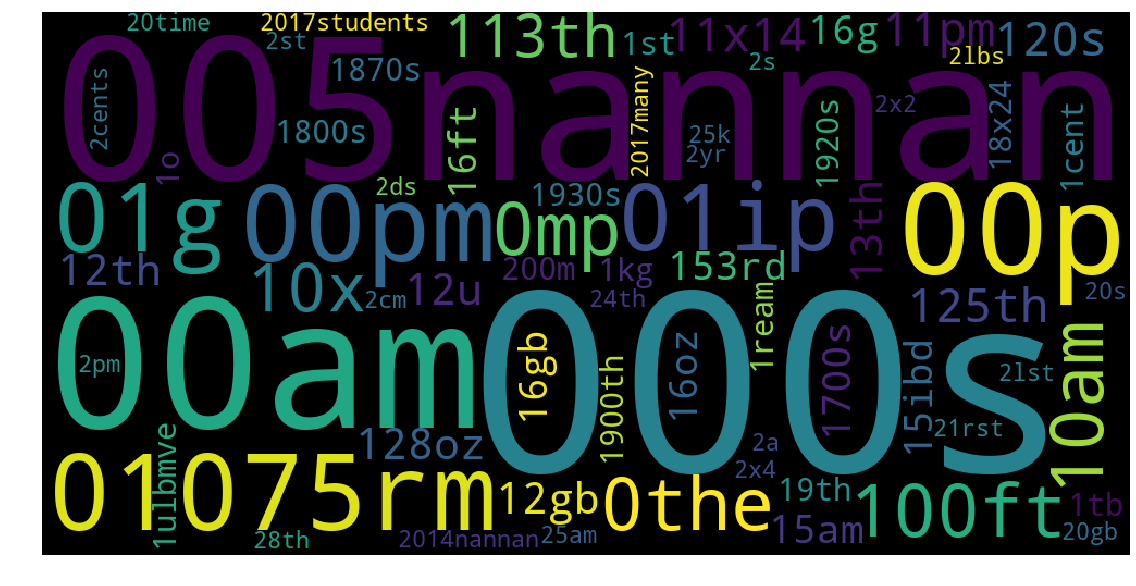

In [458]:
#Word Cloud for False Positives words
#----------------------------------------------
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(fp_words_TFIDFW2V)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

#### Box - Plot with the price of these False positive data points<font color='red'> SET 4</font>

3033
**************************************************


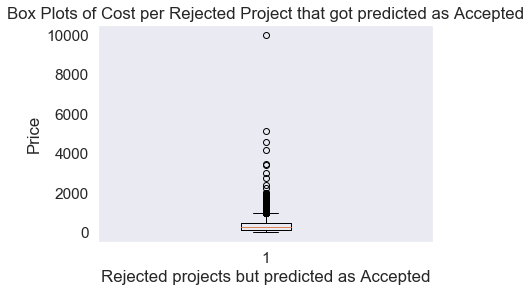

In [459]:

print(len(false_positives_index_b))
print("*"*50)

#select all row of fp index
df2 = pd.DataFrame(x_test['price'])
df2_fina1 = df2.iloc[false_positives_index_b,:]

plt.boxplot(df2_fina1.values)
plt.title('Box Plots of Cost per Rejected Project that got predicted as Accepted')
plt.xlabel('Rejected projects but predicted as Accepted')
plt.ylabel('Price')
plt.grid()
plt.show()

 Majority of the projects that were rejected but predicted as accepted Costs almost less than 1000 Dollars.
    
 A Few of them are Extremely costs costing more than 4000 Dollars.

#### pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`<font color='red'> SET 4</font>

(3033, 1)


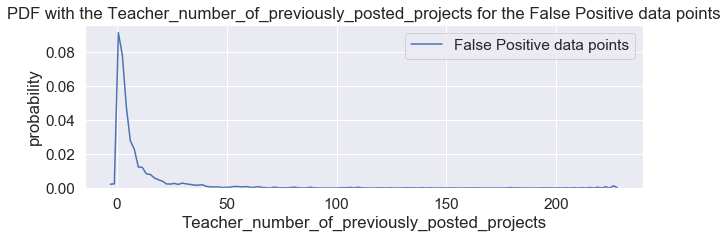

In [460]:
df3 = pd.DataFrame(x_test['teacher_number_of_previously_posted_projects'])
df3_final = df3.iloc[false_positives_index_b,:]
print(df3_final.shape)

plt.figure(figsize=(10,3))
sns.distplot(df3_final.values, hist=False, label="False Positive data points")
plt.title('PDF with the Teacher_number_of_previously_posted_projects for the False Positive data points')
plt.xlabel('Teacher_number_of_previously_posted_projects')
plt.ylabel('probability')
plt.legend()
plt.show()

Majority of the cases have Teachers with previously posted projects as zero (which is nearly 10% of the total data)

### 5k best features from features of Set 2 using`feature_importances <font color='red'> SET 2</font>

In [291]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

#### vectorize the essay  and title data,<font color='red'> SET 2</font>

In [461]:
#convert the essay text to vector
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_essay_tfidf = TfidfVectorizer()
vectorizer_essay_tfidf.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data
z_tfidf1=vectorizer_essay_tfidf.fit(x_train['preprocessed_essays'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_tfidf_essays = vectorizer_essay_tfidf.transform(x_train['preprocessed_essays'].values)
#x_cv_tfidf_essays = vectorizer_essay_tfidf.transform(x_cv['preprocessed_essays'].values)
x_test_tfidf_essays = vectorizer_essay_tfidf.transform(x_test['preprocessed_essays'].values)

print("Shape of matrix after one hot encodig ",x_train_tfidf_essays.shape, y_train.shape)
#print("Shape of matrix after one hot encodig ",x_cv_tfidf_essays.shape)
print("Shape of matrix after one hot encodig ",x_test_tfidf_essays.shape)


Shape of matrix after one hot encodig  (76471, 48972) (76471,)
Shape of matrix after one hot encodig  (32774, 48972)


In [462]:
#convert the title text to vector
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_title_tfidf = TfidfVectorizer()
vectorizer_title_tfidf.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data
z_tfidf2=vectorizer_title_tfidf.fit(x_train['preprocessed_project_title'].values)# fit has to apply only on train data

# we use fitted CountVectorizer to convert the text to vector
x_train_tfidf_title = vectorizer_title_tfidf.transform(x_train['preprocessed_project_title'].values)
#x_cv_tfidf_title = vectorizer_title_tfidf.transform(x_cv['preprocessed_project_title'].values)
x_test_tfidf_title = vectorizer_title_tfidf.transform(x_test['preprocessed_project_title'].values)

print("Shape of matrix after one hot encodig ",x_train_tfidf_title.shape)
#print("Shape of matrix after one hot encodig ",x_cv_tfidf_title.shape)
print("Shape of matrix after one hot encodig ",x_test_tfidf_title.shape)

Shape of matrix after one hot encodig  (76471, 14337)
Shape of matrix after one hot encodig  (32774, 14337)


#### merge all sparse data,<font color='red'> SET 2</font>

In [494]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
x_train_tfidf = hstack((x_train_ohe, x_train_tfidf_essays, x_train_tfidf_title)).tocsr()
#x_cv_tfidf = hstack((x_cv_ohe, x_cv_tfidf_essays, x_cv_tfidf_title)).tocsr()
x_test_tfidf = hstack((x_test_ohe, x_test_tfidf_essays, x_test_tfidf_title)).tocsr()

print(x_train_tfidf.shape, y_train.shape)
#print(x_cv_tfidf.shape, y_cv.shape)
print(x_test_tfidf.shape, y_test.shape)
print(type(x_train_tfidf))

(76471, 63332) (76471,)
(32774, 63332) (32774,)
<class 'scipy.sparse.csr.csr_matrix'>


#### find best 5k feature

In [464]:
#https://stackoverflow.com/questions/49170296/scikit-learn-feature-importance-calculation-in-decision-trees

## Fit the Model to obtain the best 5k features

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_graphviz
from sklearn.feature_selection import mutual_info_classif

clf = DecisionTreeClassifier(class_weight='balanced')

clf.fit(x_train_tfidf, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [465]:
## Compute the Feature importances for our Train Features

feat_importance = clf.tree_.compute_feature_importances(normalize=False)

In [466]:
print("feat importance = " + str(feat_importance))

feat importance = [0. 0. 0. ... 0. 0. 0.]


In [467]:
import pandas as pd
df = pd.DataFrame(feat_importance)

df = np.transpose(df)

In [468]:
## Store the indexes of the features with atleast some importance. Lets ignore the features with 0
## as the feature importance value and instead consider all the values other than these 

best_ind = []

for j in range(14355):
    
    s = df[j].sum()
    
    if s > 0 :
        best_ind.append(j)
    else :
        continue

In [469]:
best_ind[0:2]

[12, 16]

In [470]:
## Identify number of Features after feature importance step
len(best_ind)

660

In [471]:
x_train_tfidf.shape

(76471, 63332)

In [486]:
x_train_tfidf

<76471x63332 sparse matrix of type '<class 'numpy.float64'>'
	with 10156399 stored elements in Compressed Sparse Row format>

In [493]:
print(type(x_train_tfidf))
print(x_train_tfidf.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(76471, 63332)


In [499]:
df_x_train = pd.DataFrame(x_train_tfidf.todense())
df_x_train.shape


In [223]:
df_x_test = pd.DataFrame(x_test_tfidf.todense())

In [224]:
final_df_train = df_x_train.iloc[:, best_ind]
final_df_test = df_x_test.iloc[:, best_ind]

### Gridsearch CV

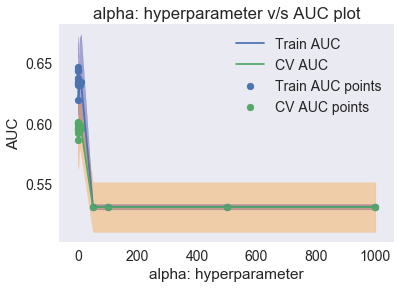

In [225]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier


sv = SGDClassifier(loss='hinge', penalty='l2')

parameters = {'alpha':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}

clf = GridSearchCV(sv, parameters, cv= 10, n_jobs=-1,scoring='roc_auc',return_train_score=True)

clf.fit(final_df_train, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

In [226]:
print(clf.best_score_)
print(clf.best_estimator_)

0.6015298130273076
SGDClassifier(alpha=0.5, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


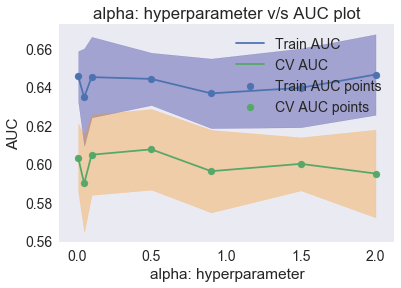

In [227]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier


sv = SGDClassifier(loss='hinge', penalty='l2',class_weight='balanced')

parameters = {'alpha':[0.01, 0.05, 0.1, 0.5, 0.9, 1.5, 2.0]}

clf = GridSearchCV(sv, parameters, cv= 10, n_jobs=-1,scoring='roc_auc')

clf.fit(final_df_train, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.3,color='darkblue')

plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.3,color='darkorange')

plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC plot")
plt.grid()
plt.show()

In [292]:
C_hyperparameter_set5=0.5

### Implementing Best Hyperparameter

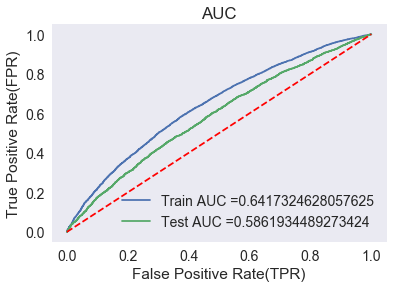

In [293]:

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

clf = SGDClassifier(loss='hinge', penalty='l2', alpha=C_hyperparameter_set5,class_weight='balanced')


clf.fit(final_df_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = clf.decision_function(final_df_train)   
y_test_pred = clf.decision_function(final_df_test)


best5k_auc_train = auc(train_fpr, train_tpr)
best5k_auc_auc_test = auc(test_fpr, test_tpr)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'r--')
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Confusion matrix

In [231]:
#CONFUSION MATRIX
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

TRAIN confusion matrix
the maximum value of tpr*(1-fpr) 0.36201908936266186 for threshold 1.0
[[ 3144  2051]
 [12104 17700]]
the maximum value of tpr*(1-fpr) 0.36201908936266186 for threshold 1.0


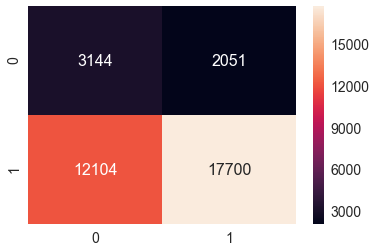

In [232]:
print("="*100)
print("TRAIN confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))


conf_matr_df_train_1 = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_train_1, annot=True,annot_kws={"size": 16}, fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3128698547827216 for threshold 1.0
[[1186 1080]
 [5308 7426]]
the maximum value of tpr*(1-fpr) 0.3128698547827216 for threshold 1.0


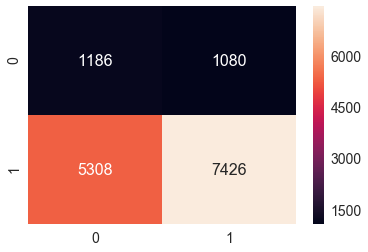

In [233]:
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)))


conf_matr_df_test_1 = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)), range(2),range(2))

sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matr_df_test_1, annot=True,annot_kws={"size": 16}, fmt='g')

## <h1>3. Conclusion</h1>

In [0]:
# Please compare all your models using Prettytable library

In [0]:
#!pip install prettytable

In [294]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model","Hyper parameter_penalty", "Hyper parameter_alpha","AUC_Train", "AUC_test","depth","split"]
x.add_row(["BOW", "Decision tree", "l2","-----", BOW_auc_train,BOW_auc_test,depth_hyperparameter_bow,split_hyperparameter_bow])
x.add_row(["TFIDF", "Decision tree", "l2","----", TFIDF_auc_train,TFIDF_auc_test,depth_hyperparameter_tfidf,split_hyperparameter_tfidf])
x.add_row(["AVG W2V", "Decision tree", "l2","----", AVGW2V_auc_train,AVGW2V_auc_test,depth_hyperparameter_AVGW2V,split_hyperparameter_AVGW2V])
x.add_row(["TFIDF AVG W2V", "Decision tree", "l2","------",TFIDFW2V_auc_train,TFIDFW2V_auc_test,depth_hyperparameter_TFIDFW2V,split_hyperparameter_TFIDFW2V])
x.add_row(["SET 5", "linear support vector", "l2", C_hyperparameter_set5, best5k_auc_train,best5k_auc_auc_test,"----","----"])
print(x)

+---------------+-----------------------+-------------------------+-----------------------+--------------------+--------------------+-------+-------+
|   Vectorizer  |         Model         | Hyper parameter_penalty | Hyper parameter_alpha |     AUC_Train      |      AUC_test      | depth | split |
+---------------+-----------------------+-------------------------+-----------------------+--------------------+--------------------+-------+-------+
|      BOW      |     Decision tree     |            l2           |         -----         | 0.667038720991259  | 0.6090163888407943 |   10  |  500  |
|     TFIDF     |     Decision tree     |            l2           |          ----         | 0.6510709009481128 | 0.6096337289679478 |   10  |  500  |
|    AVG W2V    |     Decision tree     |            l2           |          ----         | 0.7017654870337344 | 0.5931936323255488 |   10  |  500  |
| TFIDF AVG W2V |     Decision tree     |            l2           |         ------        | 0.654836

Observation:

1)BOW, TFIDF and Set 5(combine all except vectorized dataset) give optimal result with L2 Regularizer while AVG W2W and TFIDF weighted AVG W2V shows optimality with L1 Regularization.

2) Hyper parameter prefer high value for model with AVG W2V vectorizer. Lo wvalue for model having BOW and TFIDF vectorizer.

3)AUC value of training, test , cv dataset nearly same which show that model in all case is not underfit, nor overfit.